## CREDIT EDA CASE STUDY (by Sowmya Vijeth and Simran Singh)

## Loading and Viewing the APPLICATION DATASET

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the datasets
app_data = pd.read_csv("application_data.csv")
#prev_data = pd.read_csv("previous_application.csv")

In [3]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Structure of the dataset

In [4]:
# Checking the numbers of columns and rows
app_data.shape

(307511, 122)

In [5]:
#Checking the datatypes of the dataset
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

## Changing some datatypes

In [6]:
#Changing the datatypes of few columns
app_data.TARGET = app_data.TARGET.astype(str)
app_data.CNT_FAM_MEMBERS = app_data.CNT_FAM_MEMBERS.astype(pd.Int64Dtype())
app_data.DAYS_BIRTH = app_data.DAYS_BIRTH.astype(pd.Int32Dtype())
#app_data.DAYS_REGISTRATION = app_data.DAYS_REGISTRATION.astype(pd.Int64Dtype())

In [7]:
# looking at if datatypes have been rectified
app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        object 
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    Int32  
 18  DAYS_EMPLOYED          

In [8]:
#Inspecting the numerical columns by rounding it upto 2 decimal places
app_data.describe().round(2)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,3.075110e+05,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,...,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.42,1.687979e+05,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,...,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.72,2.371231e+05,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,...,0.09,0.02,0.02,0.02,0.08,0.11,0.20,0.92,0.79,1.87
min,100002.00,0.00,2.565000e+04,45000.00,1615.50,40500.00,0.00,-25229.00,-17912.00,-24672.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,189145.50,0.00,1.125000e+05,270000.00,16524.00,238500.00,0.01,-19682.00,-2760.00,-7479.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,278202.00,0.00,1.471500e+05,513531.00,24903.00,450000.00,0.02,-15750.00,-1213.00,-4504.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,367142.50,1.00,2.025000e+05,808650.00,34596.00,679500.00,0.03,-12413.00,-289.00,-2010.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
max,456255.00,19.00,1.170000e+08,4050000.00,258025.50,4050000.00,0.07,-7489.00,365243.00,0.00,...,1.00,1.00,1.00,1.00,4.00,9.00,8.00,27.00,261.00,25.00


##### Comment

 - On the whole, the numerical columns look fine. Moving ahead with checking missing values

## Dropping Duplicate records

In [9]:
#Dropping duplicates
app_data.drop_duplicates(inplace=True)

In [10]:
app_data.shape # No duplicate records

(307511, 122)

## Checking null values

In [11]:
pd.set_option('display.max_rows',500) # to view all the rows
pd.set_option('display.max_columns',500) # to view all the columns

#Checking the null values of all the columns
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [12]:
#Checking the percentage of missing values in columns
app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

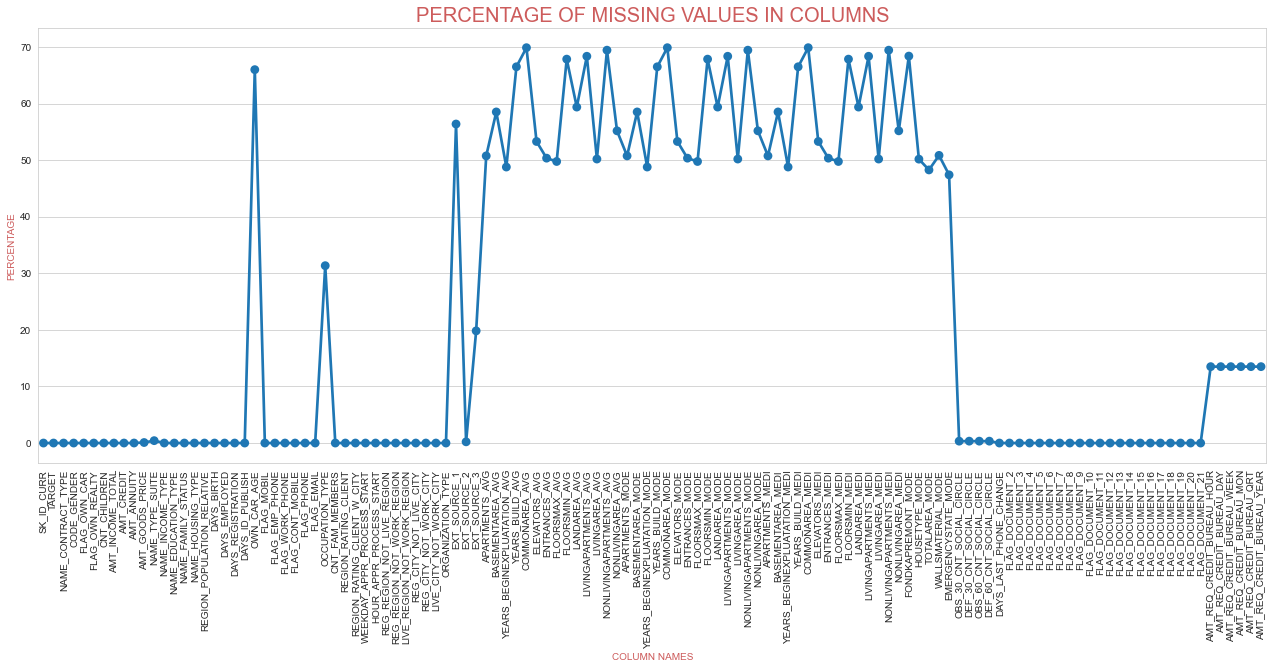

In [13]:
#Plotting missing values of the dataframe - application data

sns.set_style('whitegrid')

fig = plt.figure(figsize=(22,8))
miss_app_data = pd.DataFrame((app_data.isnull().sum())*100/app_data.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=miss_app_data)

plt.xticks(rotation =90);
plt.xlabel('COLUMN NAMES', fontdict = {'color':'indianred','fontsize':10})
plt.ylabel('PERCENTAGE',  fontdict = {'color':'indianred','fontsize':10})
plt.title("PERCENTAGE OF MISSING VALUES IN COLUMNS",  fontdict = {'color':'indianred','fontsize':20});

## Dropping columns with missing values more than 40%

In [14]:
#Listing columns which have more than 40% missing data
missing_40 = app_data.columns[(round(app_data.isnull().sum()/len(app_data),2)*100)>40]
missing_40

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [15]:
#As per industry standards, columns which have more than 40-50% missing data can be dropped depending on the data acquired and the specific sector
app_data = app_data.drop(missing_40,axis=1)

In [16]:
#Checking the dropped columns
app_data.shape

(307511, 73)

In [17]:
# checing percentage once again
app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

## Taking absolute values of certain columns which have negative values


In [18]:
app_data.DAYS_BIRTH = (abs(app_data.DAYS_BIRTH)/365)
app_data.DAYS_EMPLOYED = abs(app_data.DAYS_EMPLOYED/365)
app_data.DAYS_LAST_PHONE_CHANGE = abs(app_data.DAYS_LAST_PHONE_CHANGE)
app_data.DAYS_ID_PUBLISH = abs(app_data.DAYS_ID_PUBLISH)

## Imputing Missing Values for the columns with missing values <13%

In [19]:
#To supress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' %x)

app_data.AMT_ANNUITY.isnull().sum()

12

In [20]:
app_data.AMT_ANNUITY.describe()

count   307499.00
mean     27108.57
std      14493.74
min       1615.50
25%      16524.00
50%      24903.00
75%      34596.00
max     258025.50
Name: AMT_ANNUITY, dtype: float64

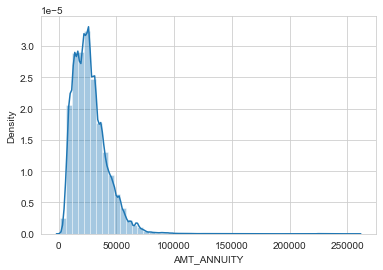

In [21]:
sns.set_style('whitegrid')
sns.distplot(app_data.AMT_ANNUITY);

In [22]:
app_data.AMT_ANNUITY.fillna(24903, inplace=True)

Comment: Since this is a numerical variable that is skewed, likely because of outliers, we fill nan with 24903 i.e, Median for this field


In [23]:
app_data.AMT_GOODS_PRICE.isnull().sum()

278

In [24]:
app_data.AMT_GOODS_PRICE.describe()

count    307233.00
mean     538396.21
std      369446.46
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

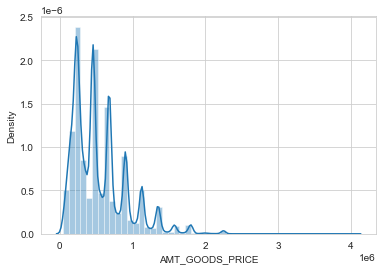

In [25]:
sns.distplot(app_data.AMT_GOODS_PRICE);

In [26]:
app_data.AMT_GOODS_PRICE.fillna(450000, inplace=True)

Comment: Since this is a numerical variable that is skewed, likely because of outliers, we fill nan with 450000 i.e, Median for this field


In [27]:
app_data.NAME_TYPE_SUITE.isnull().sum()

1292

In [28]:
app_data.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [29]:
app_data.NAME_TYPE_SUITE.fillna("Unaccompanied", inplace=True)

Comment: Since this is a categorical variable, we fill nan with "Unaccompanied" i.e, Mode for this field

In [30]:
app_data.EXT_SOURCE_2.isnull().sum()

660

In [31]:
app_data.EXT_SOURCE_2.describe()

count   306851.00
mean         0.51
std          0.19
min          0.00
25%          0.39
50%          0.57
75%          0.66
max          0.85
Name: EXT_SOURCE_2, dtype: float64

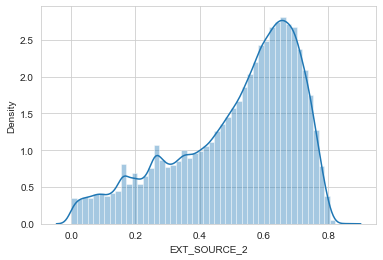

In [32]:
sns.distplot(app_data.EXT_SOURCE_2);

In [33]:
app_data.EXT_SOURCE_2.fillna(0.51, inplace=True)

Comment: Since this is a numerical variable that is quite centrally distributed, we fill nan with 0.51 i.e, Mean for this field

In [34]:
app_data.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [35]:
app_data.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count   306490.00
mean         1.42
std          2.40
min          0.00
25%          0.00
50%          0.00
75%          2.00
max        348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

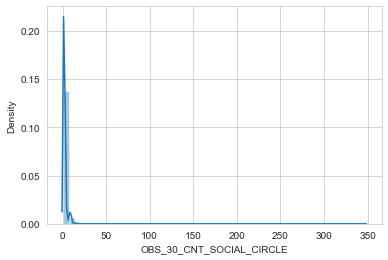

In [36]:
sns.distplot(app_data.OBS_30_CNT_SOCIAL_CIRCLE);

In [37]:
app_data.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)

Comment: Since this is a numerical variable that is skewed, likely because of outliers, we fill nan with 0 i.e, Median for this field

In [38]:
app_data.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [39]:
app_data.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count   306490.00
mean         0.14
std          0.45
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         34.00
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

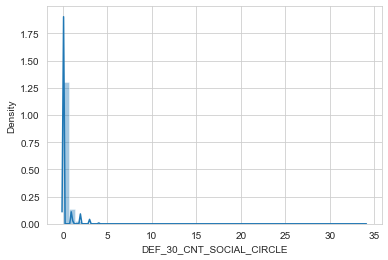

In [40]:
sns.distplot(app_data.DEF_30_CNT_SOCIAL_CIRCLE);

In [41]:
app_data.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)

Comment: Since this is a numerical variable that is skewed, likely because of outliers, we fill nan with 0 i.e, Median for this field

In [42]:
app_data.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [43]:
app_data.OBS_60_CNT_SOCIAL_CIRCLE.describe()

count   306490.00
mean         1.41
std          2.38
min          0.00
25%          0.00
50%          0.00
75%          2.00
max        344.00
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

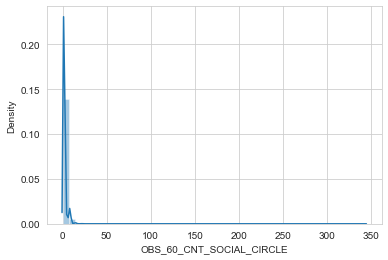

In [44]:
sns.distplot(app_data.OBS_60_CNT_SOCIAL_CIRCLE);

In [45]:
app_data.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)

Comment: Since this is a numerical variable that is skewed, likely because of outliers, we fill nan with 0 i.e, Median for this field

In [46]:
app_data.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

1021

In [47]:
app_data.DEF_60_CNT_SOCIAL_CIRCLE.describe()

count   306490.00
mean         0.10
std          0.36
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         24.00
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

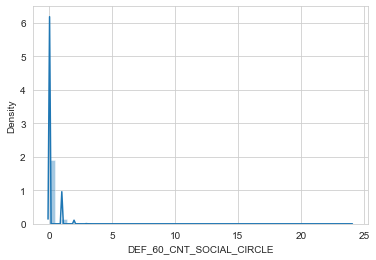

In [48]:
sns.distplot(app_data.DEF_60_CNT_SOCIAL_CIRCLE);

In [49]:
app_data.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0, inplace=True)

Comment: Since this is a numerical variable that is skewed, likely because of outliers, we fill nan with 0 i.e, Median for this field

In [50]:
app_data.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [51]:
app_data.DAYS_LAST_PHONE_CHANGE.describe()

count   307510.00
mean       962.86
std        826.81
min          0.00
25%        274.00
50%        757.00
75%       1570.00
max       4292.00
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

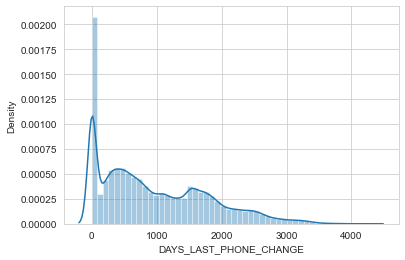

In [52]:
sns.distplot(app_data.DAYS_LAST_PHONE_CHANGE);

In [53]:
app_data.DAYS_LAST_PHONE_CHANGE.fillna(757, inplace=True)

Comment: Since this is a numerical variable that is skewed, likely because of outliers, we fill nan with 757 i.e, Median for this field

## Imputation suggestions for missing values >13% in columns

In the context of case study it is not necessary to impute missing values, hence we are providing sugessions for treatment of the missing values between 13% and 40%

In [54]:
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

41519

In [55]:
app_data.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count   265992.00
mean         0.01
std          0.08
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          4.00
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

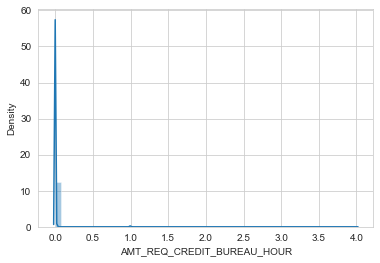

In [56]:
sns.distplot(app_data['AMT_REQ_CREDIT_BUREAU_HOUR']) 
plt.show()

###### Suggestion

Since this is a numerical variable that is skewed, likely because of outliers, we suggest to fill nan with 0 i.e, Median for this field

In [57]:
app_data.AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

41519

In [58]:
app_data.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count   265992.00
mean         0.01
std          0.11
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          9.00
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

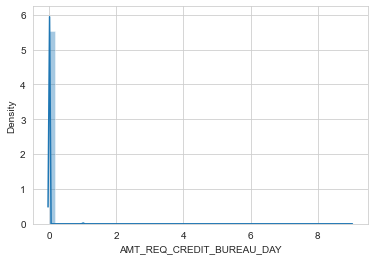

In [59]:
sns.distplot(app_data['AMT_REQ_CREDIT_BUREAU_DAY']) 
plt.show()

###### Suggestion

Since this is a numerical variable that is skewed, likely because of outliers, we suggest to fill nan with 0 i.e, Median for this field

In [60]:
app_data.AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

41519

In [61]:
app_data.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count   265992.00
mean         0.03
std          0.20
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          8.00
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

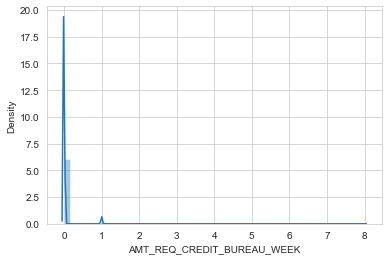

In [62]:
sns.distplot(app_data['AMT_REQ_CREDIT_BUREAU_WEEK']) 
plt.show()

###### Suggestion

Since this is a numerical variable that is skewed, likely because of outliers, we suggest to fill nan with 0 i.e, Median for this field

In [63]:
app_data.AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

41519

In [64]:
app_data.AMT_REQ_CREDIT_BUREAU_MON.describe()

count   265992.00
mean         0.27
std          0.92
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         27.00
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

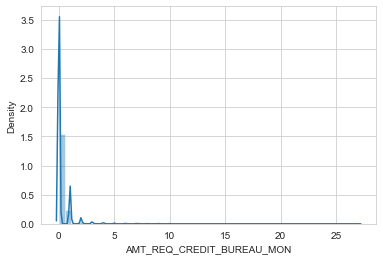

In [65]:
sns.distplot(app_data['AMT_REQ_CREDIT_BUREAU_MON']) 
plt.show()

###### Suggestion

Since this is a numerical variable that is skewed, likely because of outliers, we suggest to fill nan with 0 i.e, Median for this field

In [66]:
app_data.EXT_SOURCE_3.describe()

count   246546.00
mean         0.51
std          0.19
min          0.00
25%          0.37
50%          0.54
75%          0.67
max          0.90
Name: EXT_SOURCE_3, dtype: float64

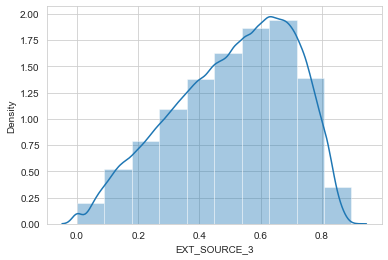

In [67]:
sns.distplot(app_data['EXT_SOURCE_3'], bins = 10) 
plt.show()

###### Suggestion

Since this is a numerical variable that is quite centrally distributed, we fill nan with 0.54 i.e, Mean for this field

In [68]:
app_data.OCCUPATION_TYPE.isnull().sum()

96391

Although the OCCUPATION_TYPE column has more than 13% null values, in a business knowledge context it would not be wise to impute values into someone's Occupation. Thus we leave this column as it is, and simply stay aware of the fact that such is the case in this column.

## Seperating Categorical and Numerical Columns in application_data.csv

In [69]:
Numerical = app_data.select_dtypes(include = (np.number)).columns
Categorical =app_data.select_dtypes(exclude = (np.number)).columns

In [70]:
for x in Numerical:
    print(x)

SK_ID_CURR
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_2
EXT_SOURCE_3
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_

In [71]:
for x in Categorical:
    print(x)

TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


## Outlier Detection and Treatment


For outlier detection we can use: 
- Box plot
- Describe function
- Quantile function

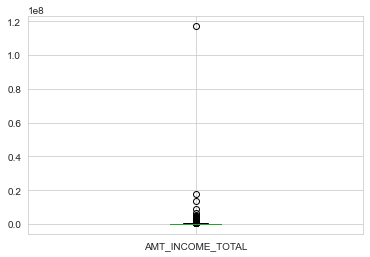

In [72]:
app_data.boxplot("AMT_INCOME_TOTAL")
plt.show()

In [73]:
app_data.AMT_INCOME_TOTAL.describe()

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
25%        112500.00
50%        147150.00
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [74]:
# app_data.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

###### Inference and Suggestion:

- We can see that there is a big difference in between the 75th percentile value and the maximum value. We can even visually see these outliers through the boxplot. 
- Additionally, we can see that there is a value of '117000000' in the AMT_INCOME_TOTAL column that is an outlier much farther than the rest of the values. 
- There is large variation in data between 99th percentile and max value. In this column for income, it is possible to see variations like this. We can choose not to treat them, and instead just be aware of the situation and let them be left untreated. Thus whenever we are aggregating/analysing these values, instead of looking at the mean, we can look at percentiles/medians so we dont get affected by outliers.
- Such a decision is dependant on a case by case basis according to the business problem.

In [75]:
app_data.shape

(307511, 73)

In [76]:
#We finally decided to cap the outliers at 99th percentile
app_data = app_data[app_data.AMT_INCOME_TOTAL <472500]

In [77]:
app_data.shape

(304417, 73)

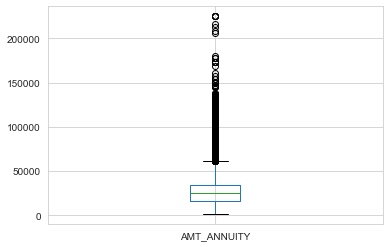

In [78]:
app_data.boxplot("AMT_ANNUITY")
plt.show()

In [79]:
app_data.AMT_ANNUITY.describe()

count   304417.00
mean     26865.53
std      14072.60
min       1615.50
25%      16456.50
50%      24750.00
75%      34362.00
max     225000.00
Name: AMT_ANNUITY, dtype: float64

In [80]:
app_data.AMT_ANNUITY.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50   24750.00
0.70   31657.50
0.90   45361.80
0.95   52686.00
0.99   68850.00
Name: AMT_ANNUITY, dtype: float64

###### Inference and Suggestion:

- We can see that there is a big difference in between the 75th percentile value '34596' and the maximum value '258025'.
- We can visually see these outliers through the boxplot.
- These outliers are valid for AMT_ANNUITY column and the max value can be capped in this situation.
- Or we can choose not to treat them, and instead just be aware of the situation and let them be left untreated. Thus whenever we are aggregating/analysing these values, instead of looking at the mean, we can look at percentiles/medians so we dont get affected by outliers.
- Such a decision is dependant on a case by case basis according to the business problem

In [81]:
app_data.shape

(304417, 73)

In [82]:
#We finally decided to cap the outliers at max value

app_data = app_data[app_data.AMT_ANNUITY < 258025]

In [83]:
app_data.shape

(304417, 73)

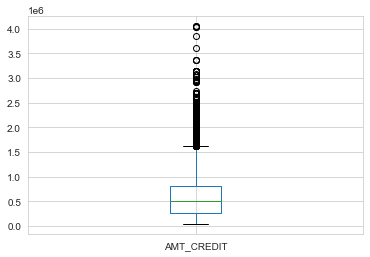

In [84]:
app_data.boxplot("AMT_CREDIT")
plt.show()

In [85]:
app_data.AMT_CREDIT.describe()

count    304417.00
mean     593754.91
std      396652.33
min       45000.00
25%      270000.00
50%      509400.00
75%      808650.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

In [86]:
app_data.AMT_CREDIT.quantile([0.1, 0.7, 0.9, 0.95, 0.99])

0.10    180000.00
0.70    746280.00
0.90   1125000.00
0.95   1350000.00
0.99   1800000.00
Name: AMT_CREDIT, dtype: float64

###### Inference and Suggestion:

- We can see that there is a big difference in between the 70 quantile value and 99 quantile value.We can even visually see these outliers through the boxplot. 
- These outliers are valid for AMT_CREDIT columns and can differ between applicants.
- Hence not treating the outliers

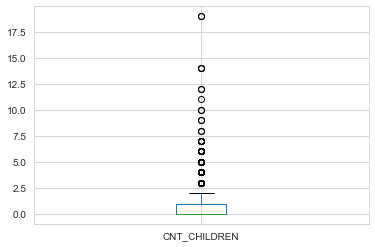

In [87]:
app_data.boxplot("CNT_CHILDREN")
plt.show()

In [88]:
app_data.CNT_CHILDREN.describe()

count   304417.00
mean         0.42
std          0.72
min          0.00
25%          0.00
50%          0.00
75%          1.00
max         19.00
Name: CNT_CHILDREN, dtype: float64

In [89]:
app_data.CNT_CHILDREN.value_counts()

0     213354
1      60437
2      26431
3       3651
4        419
5         83
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [90]:
app_data.CNT_CHILDREN.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50   0.00
0.70   0.00
0.90   2.00
0.95   2.00
0.99   3.00
Name: CNT_CHILDREN, dtype: float64

###### Inference and Suggestion:

- There are few outliers in this case but we can leave them untreated and analyse by binning the same during univariate or bivariate analysis.

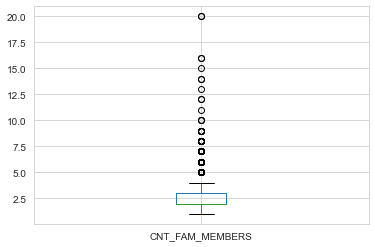

In [91]:
app_data.boxplot("CNT_FAM_MEMBERS")
plt.show()

In [92]:
app_data.CNT_FAM_MEMBERS.describe()

count   304415.00
mean         2.15
std          0.91
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         20.00
Name: CNT_FAM_MEMBERS, dtype: float64

In [93]:
app_data.CNT_FAM_MEMBERS.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50   2.00
0.70   2.00
0.90   3.00
0.95   4.00
0.99   5.00
Name: CNT_FAM_MEMBERS, dtype: object

###### Inference and Suggestion:

- We can see that there is a big difference in between the 75th percentile value '3' and the maximum value '20'.
- We can visually see these outliers through the boxplot.
- These outliers could be treated by capping at 99th percentile as there is a big gap between maximum value '20' and value at 99th percentile '5'. 
- Or we can choose not to treat them, and instead just be aware of the situation and let them be left untreated. Thus whenever we are aggregating/analysing these values, instead of looking at the mean, we can look at percentiles/medians so we dont get affected by outliers.
- Such a decision is dependant on a case by case basis according to the business problem.

In [94]:
#We finally decided to cap the outliers at max value percentile
app_data = app_data[app_data.CNT_FAM_MEMBERS < 20]

## Binning the data

In [95]:
app_data.AMT_INCOME_TOTAL = pd.cut(app_data.AMT_INCOME_TOTAL,bins=5,labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

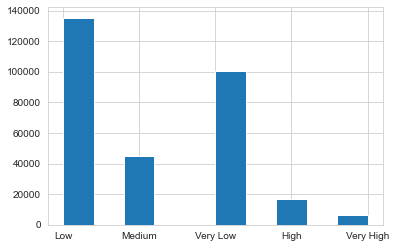

In [96]:
plt.hist(app_data.AMT_INCOME_TOTAL)
plt.show()

In [97]:
# Binning the days employed column to show work experience in years

cut_labels = ('fresher', '0 to 1 years', '1 to 2 years', 'corporate professional')
app_data["DAYS_EMPLOYED"] = pd.cut(app_data["DAYS_EMPLOYED"], bins = 4, labels = cut_labels)

In [98]:
app_data.DAYS_EMPLOYED.value_counts()

fresher                   249233
corporate professional     55180
1 to 2 years                   0
0 to 1 years                   0
Name: DAYS_EMPLOYED, dtype: int64

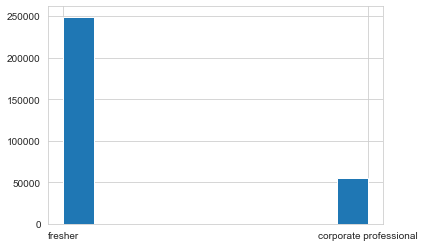

In [99]:
plt.hist(app_data.DAYS_EMPLOYED);

## Checking the Imbalance Percentage

In [100]:
app_data.TARGET.value_counts()

0    279756
1     24657
Name: TARGET, dtype: int64

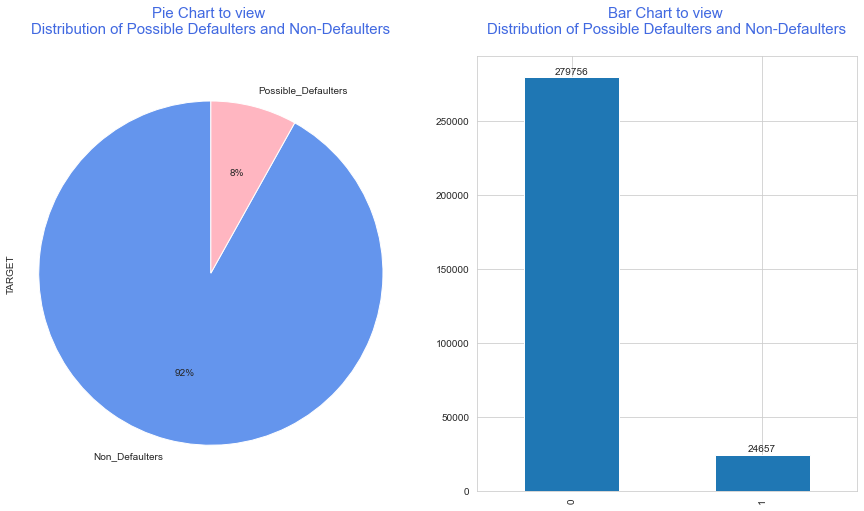

In [101]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
my_labels = 'Non_Defaulters','Possible_Defaulters'
app_data.TARGET.value_counts(normalize = True).plot( kind = 'pie',autopct = '%1.0f%%', labels = my_labels , colors = ['cornflowerblue','lightpink'],startangle=90)
plt.title("Pie Chart to view \nDistribution of Possible Defaulters and Non-Defaulters\n", fontdict = {'color' :'royalblue', 'fontsize':15} )
plt.axis('equal');

plt.subplot(1,2,2)
splot = app_data.TARGET.value_counts().plot(kind = 'bar')
plt.title("Bar Chart to view \nDistribution of Possible Defaulters and Non-Defaulters\n", fontdict = {'color' :'royalblue', 'fontsize':15} )
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points');

Inference:

We can see a data imbalance here. We see that 92% customers are not likely to be defaulters and 8% are possible defaulters (clients with payment difficulties).

In [102]:
app_data.CODE_GENDER.value_counts()

F      201067
M      103342
XNA         4
Name: CODE_GENDER, dtype: int64

In [103]:
app_data = app_data[app_data.CODE_GENDER != 'XNA']

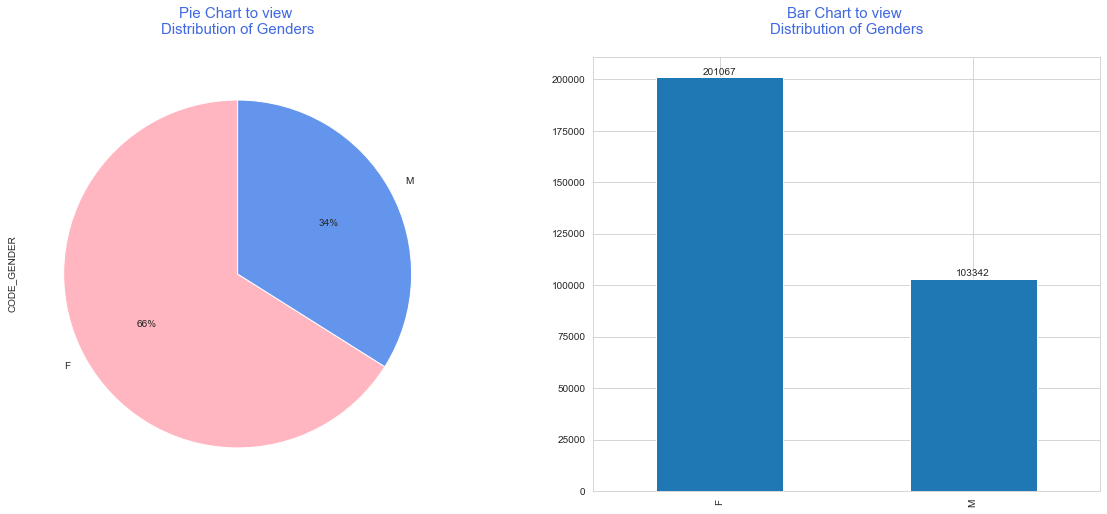

In [104]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
app_data.CODE_GENDER.value_counts(normalize = True).plot( kind = 'pie',autopct = '%1.0f%%' , colors = ['lightpink', 'cornflowerblue'],startangle=90)
plt.title("Pie Chart to view \nDistribution of Genders\n", fontdict = {'color' :'royalblue', 'fontsize':15} )

sns.set_style("whitegrid")
plt.subplot(1,2,2)

splot = app_data.CODE_GENDER.value_counts().plot(kind = 'bar')
plt.title("Bar Chart to view \nDistribution of Genders\n", fontdict = {'color' :'royalblue', 'fontsize':15} )
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points');

##### Inference
We see there is imbalance in the CODE-GENDER column. The data collected is baised towards the female customers.

## Creating two dataframes by TARGET variable

In [105]:
df1 = app_data[app_data['TARGET'] == "1"]
df0 = app_data[app_data['TARGET'] == "0"]

## Identifying the highly correlated numerical variables

In [106]:
corr1 = df1.corr().unstack().sort_values(ascending = False)
corr1 = corr1[corr1 != 1.00]
corr1 = corr1[corr1 > 0.70]
corr1.head(10)

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      1.00
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE      1.00
AMT_GOODS_PRICE              AMT_CREDIT                    0.98
AMT_CREDIT                   AMT_GOODS_PRICE               0.98
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.96
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.96
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.89
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.89
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.87
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.87
dtype: float64

In [107]:
corr0 = df0.corr().unstack().sort_values(ascending = False)
corr0 = corr0[corr0 != 1.00]
corr0 = corr0[corr0 > 0.70]
corr0.head(10)

OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE      1.00
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      1.00
AMT_CREDIT                   AMT_GOODS_PRICE               0.99
AMT_GOODS_PRICE              AMT_CREDIT                    0.99
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.95
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.88
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.86
dtype: float64

## Univariate Analysis

#### NUMERICAL VARIABLES

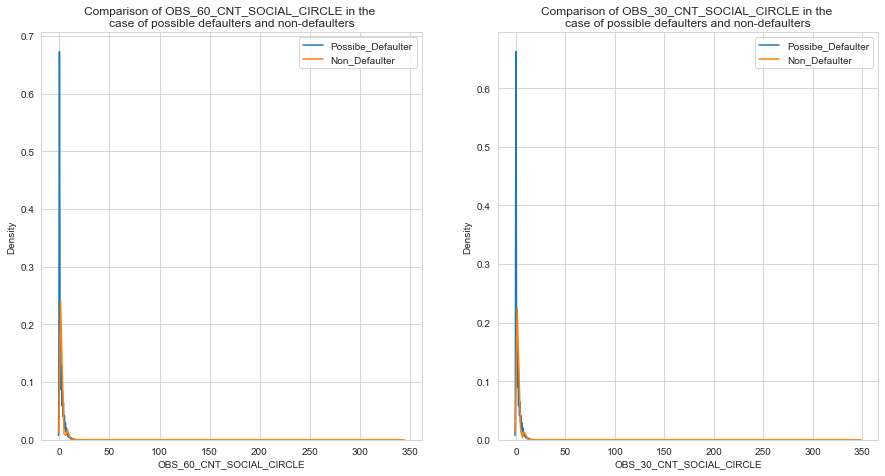

In [108]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7.5))

plt.subplot(1,2,1)
sns.distplot(df1.OBS_60_CNT_SOCIAL_CIRCLE, hist = False, label = "Possibe_Defaulter");
sns.distplot(df0.OBS_60_CNT_SOCIAL_CIRCLE, hist = False, label = "Non_Defaulter");
plt.title("Comparison of OBS_60_CNT_SOCIAL_CIRCLE in the \ncase of possible defaulters and non-defaulters")
plt.legend();

plt.subplot(1,2,2)
sns.distplot(df1.OBS_30_CNT_SOCIAL_CIRCLE, hist = False, label = "Possibe_Defaulter");
sns.distplot(df0.OBS_30_CNT_SOCIAL_CIRCLE, hist = False, label = "Non_Defaulter");
plt.title("Comparison of OBS_30_CNT_SOCIAL_CIRCLE in the \ncase of possible defaulters and non-defaulters")
plt.legend();

##### Inference
- From the first suplot we can infer that a much higher number of observations of the possible defaulters' social surroundings have observable 60 days past due default as compared to non-defaulters.

- From the second suplot we can infer a similar observation, that a much higher number of observations of the possible defaulters' social surroundings have observable 30 days past due default as compared to non-defaulters.

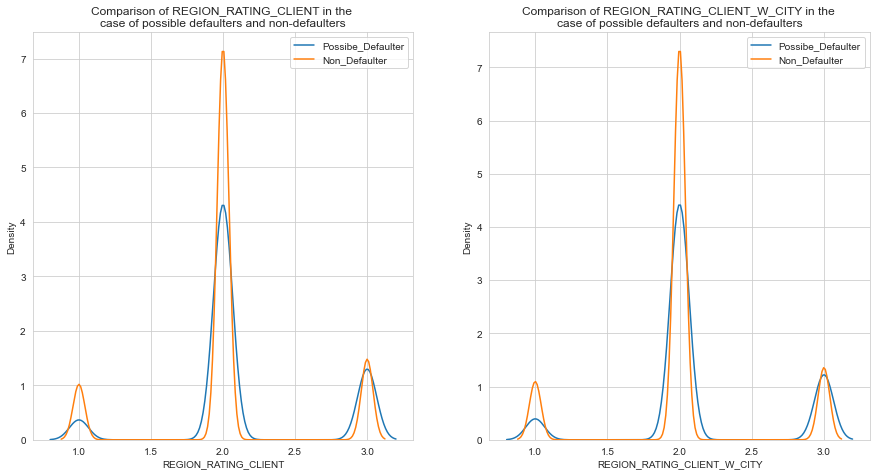

In [109]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7.5))

plt.subplot(1,2,1)
sns.distplot(df1.REGION_RATING_CLIENT, hist = False, label = "Possibe_Defaulter");
sns.distplot(df0.REGION_RATING_CLIENT, hist = False, label = "Non_Defaulter");
plt.title("Comparison of REGION_RATING_CLIENT in the \ncase of possible defaulters and non-defaulters")
plt.legend();

plt.subplot(1,2,2)
sns.distplot(df1.REGION_RATING_CLIENT_W_CITY, hist = False, label = "Possibe_Defaulter");
sns.distplot(df0.REGION_RATING_CLIENT_W_CITY, hist = False, label = "Non_Defaulter");
plt.title("Comparison of REGION_RATING_CLIENT_W_CITY in the \ncase of possible defaulters and non-defaulters")
plt.legend();

##### Inference
- From the first suplot we can infer that ratings of the regions where possible defaulters' live are quite low as compared to non-defaulters.

- From the second suplot we can infer a similar observation, that ratings of the regions where possible defaulters' live, with taking city into account, are quite low as compared to non-defaulters.

Text(0.5, 1.0, 'Comparison of REGION_RATING_CLIENT_W_CITY in the \ncase of possible defaulters and non-defaulters')

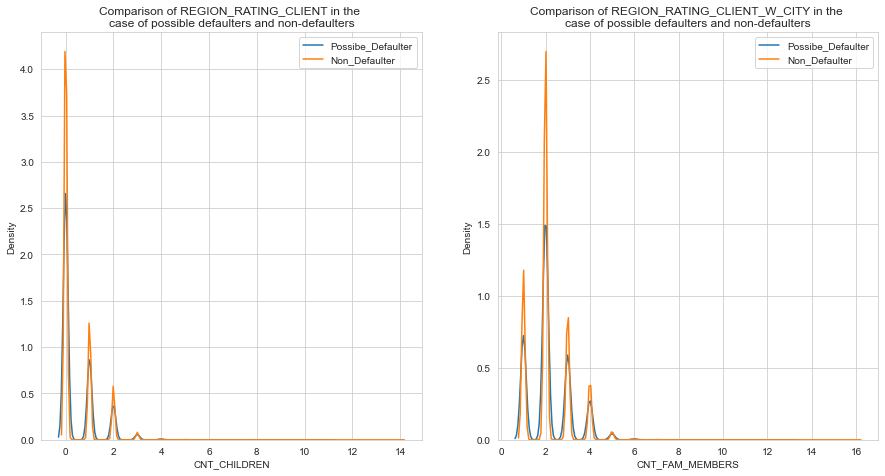

In [110]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 7.5))

plt.subplot(1,2,1)
sns.distplot(df1.CNT_CHILDREN, hist = False, label = "Possibe_Defaulter");
sns.distplot(df0.CNT_CHILDREN, hist = False, label = "Non_Defaulter");
plt.legend();
plt.title("Comparison of REGION_RATING_CLIENT in the \ncase of possible defaulters and non-defaulters")

plt.subplot(1,2,2)
sns.distplot(df1.CNT_FAM_MEMBERS, hist = False, label = "Possibe_Defaulter");
sns.distplot(df0.CNT_FAM_MEMBERS, hist = False, label = "Non_Defaulter");
plt.legend();
plt.title("Comparison of REGION_RATING_CLIENT_W_CITY in the \ncase of possible defaulters and non-defaulters")

##### Inference
- From the first suplot we can infer that number of children of possible defaulters' are slightly lower as compared to non-defaulters.

- From the second suplot we can infer a similar observation, that number of family members of possible defaulters' are slightly lower as compared to non-defaulters.

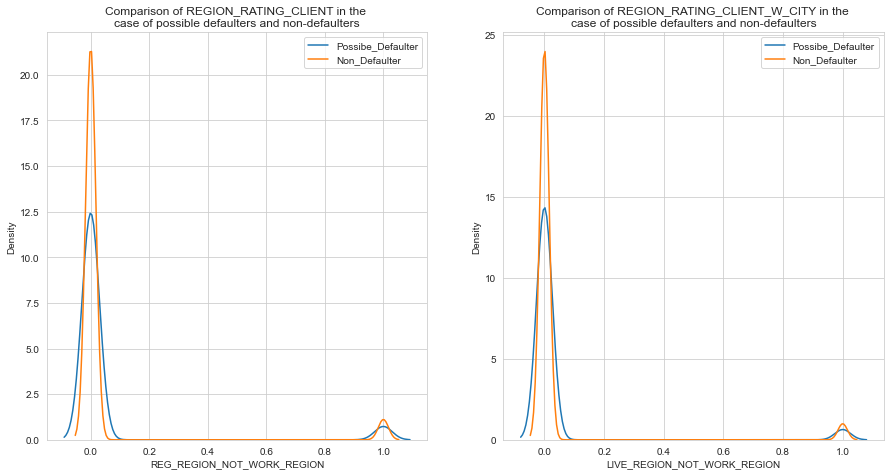

In [111]:
plt.figure(figsize=(15, 7.5))

plt.subplot(1,2,1)
sns.distplot(df1.REG_REGION_NOT_WORK_REGION, hist = False, label = "Possibe_Defaulter");
sns.distplot(df0.REG_REGION_NOT_WORK_REGION, hist = False, label = "Non_Defaulter");
plt.title("Comparison of REGION_RATING_CLIENT in the \ncase of possible defaulters and non-defaulters")
plt.legend();

plt.subplot(1,2,2)
sns.distplot(df1.LIVE_REGION_NOT_WORK_REGION, hist = False, label = "Possibe_Defaulter");
sns.distplot(df0.LIVE_REGION_NOT_WORK_REGION, hist = False, label = "Non_Defaulter");
plt.title("Comparison of REGION_RATING_CLIENT_W_CITY in the \ncase of possible defaulters and non-defaulters")
plt.legend();

##### Inference
- From the first suplot we can infer that many possible defaulters' permanent address does not match work address as compared to non-defaulters at region level.

- From the second suplot we can infer a similar observation, that many possible defaulters' contact address does not match their work address as compared to non-defaulters at region level.

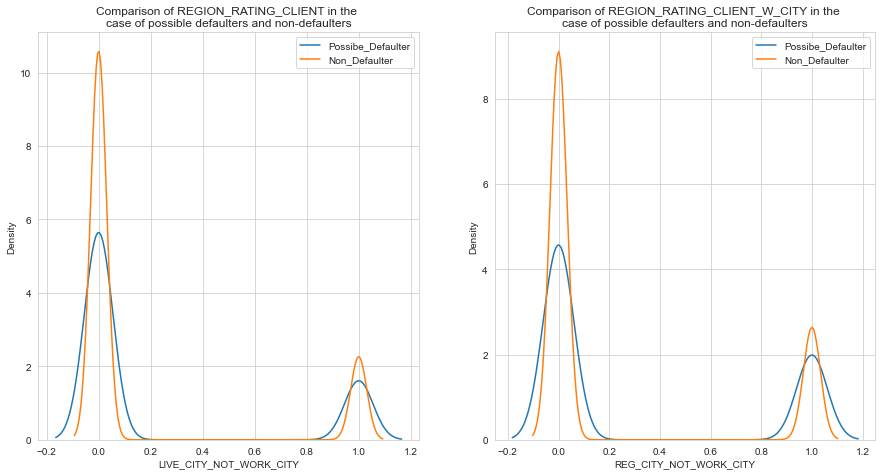

In [112]:
plt.figure(figsize=(15, 7.5))

plt.subplot(1,2,1)
sns.distplot(df1.LIVE_CITY_NOT_WORK_CITY, hist = False, label = "Possibe_Defaulter");
sns.distplot(df0.LIVE_CITY_NOT_WORK_CITY, hist = False, label = "Non_Defaulter");
plt.title("Comparison of REGION_RATING_CLIENT in the \ncase of possible defaulters and non-defaulters")
plt.legend();

plt.subplot(1,2,2)
sns.distplot(df1.REG_CITY_NOT_WORK_CITY, hist = False, label = "Possibe_Defaulter");
sns.distplot(df0.REG_CITY_NOT_WORK_CITY, hist = False, label = "Non_Defaulter");
plt.title("Comparison of REGION_RATING_CLIENT_W_CITY in the \ncase of possible defaulters and non-defaulters")
plt.legend();

##### Inference
- From the first suplot we can infer that many possible defaulters' contact address does not match work address (at city level) as compared to non-defaulters.

- From the second suplot we can infer a similar observation, that many possible defaulters' contact address does not match their work address (at city level) as compared to non-defaulters.

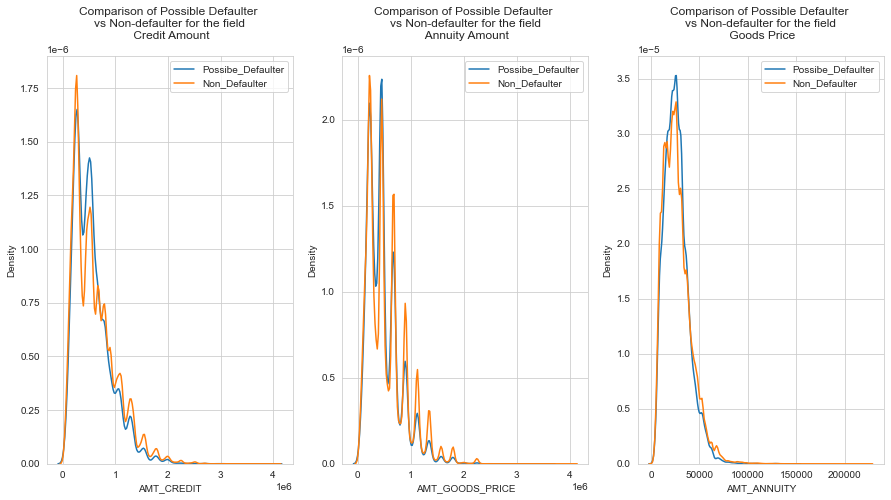

In [113]:
plt.figure(figsize=(15, 7.5))

plt.subplot(1,3,1)
sns.distplot(df1.AMT_CREDIT, hist = False, label = "Possibe_Defaulter");
sns.distplot(df0.AMT_CREDIT, hist = False, label = "Non_Defaulter");
plt.title("Comparison of Possible Defaulter \nvs Non-defaulter for the field\n Credit Amount\n")
plt.legend();

plt.subplot(1,3,2)
plt.title("Comparison of Possible Defaulter \nvs Non-defaulter for the field\n Annuity Amount\n")
sns.distplot(df1.AMT_GOODS_PRICE, hist = False, label = "Possibe_Defaulter");
sns.distplot(df0.AMT_GOODS_PRICE, hist = False, label = "Non_Defaulter");
plt.legend();

plt.subplot(1,3,3)
sns.distplot(df1.AMT_ANNUITY, hist = False, label = "Possibe_Defaulter");
sns.distplot(df0.AMT_ANNUITY, hist = False, label = "Non_Defaulter");
plt.title("Comparison of Possible Defaulter \nvs Non-defaulter for the field\n Goods Price\n")
plt.legend();

##### Inference

- From the first and second subplot, we can infer that as amount credit and amount goods price increase, we see more observations from the possible defaulters as compared to non defaulters. 
- From the third subplot we can infer that possible defaulters have to pay highier loan annuity than non defaulters.

#### CATEGORICAL VARIABLES

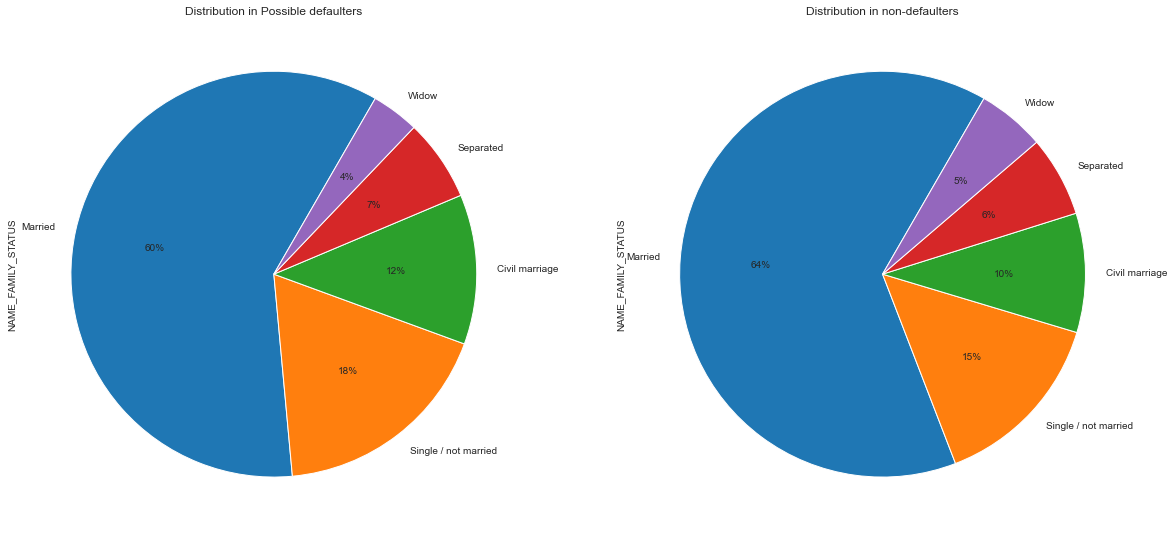

In [114]:
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)

plt.xticks(rotation = 90)
plt.title("Distribution in Possible defaulters")
df1.NAME_FAMILY_STATUS.value_counts().plot.pie(autopct = '%1.0f%%', startangle = 60);

plt.subplot(1,2,2) 
plt.xticks(rotation = 90)
plt.title("Distribution in non-defaulters")
df0.NAME_FAMILY_STATUS.value_counts().plot.pie(autopct = '%1.0f%%', startangle = 60);

##### Inference

- From the above charts we can infer that in both types of clients highest percentage of Family Status is Married. 60% of possible defaulters' married and 64% of non defaulters are married. 

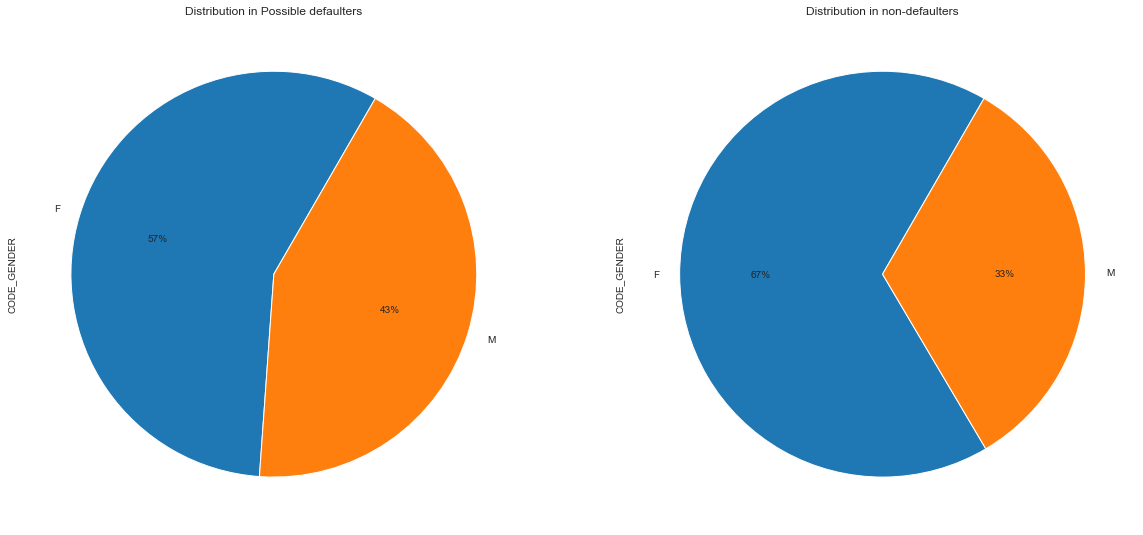

In [115]:
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)

plt.xticks(rotation = 90)
plt.title("Distribution in Possible defaulters")
df1.CODE_GENDER.value_counts().plot.pie(autopct = '%1.0f%%', startangle = 60);

plt.subplot(1,2,2) 
plt.xticks(rotation = 90)
plt.title("Distribution in non-defaulters")
df0.CODE_GENDER.value_counts().plot.pie(autopct = '%1.0f%%', startangle = 60);

##### Inference

- From the above charts we can infer that in both types of clients highest percentage of Gender is Female. 57% of possible defaulters' Female and 67% of non defaulters are Female. 

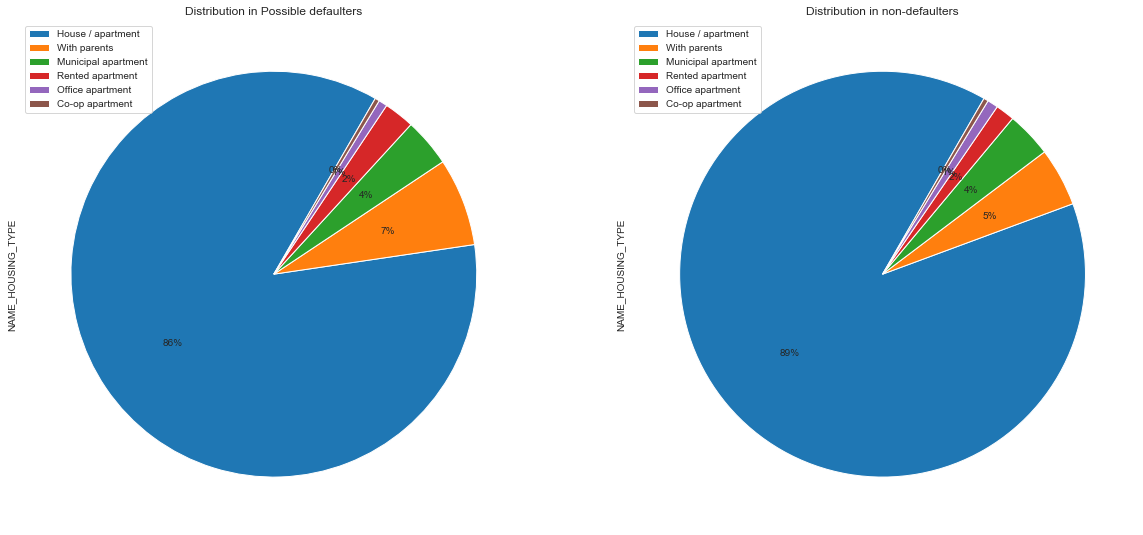

In [116]:
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)

plt.xticks(rotation = 90)
plt.title("Distribution in Possible defaulters")
df1.NAME_HOUSING_TYPE.value_counts().plot.pie(autopct = '%1.0f%%', startangle = 60,  labeldistance=None);
plt.legend();

plt.subplot(1,2,2) 
plt.xticks(rotation = 90)
plt.title("Distribution in non-defaulters")
df0.NAME_HOUSING_TYPE.value_counts().plot.pie(autopct = '%1.0f%%', startangle = 60,  labeldistance=None);
plt.legend();

##### Inference

- From the above charts we can infer that in both types of clients highest percentage of Housing Type is House/Apartment. 86% of possible defaulters' live in a House/Apartment and 89% of non defaulters live in a House/Apartment. 

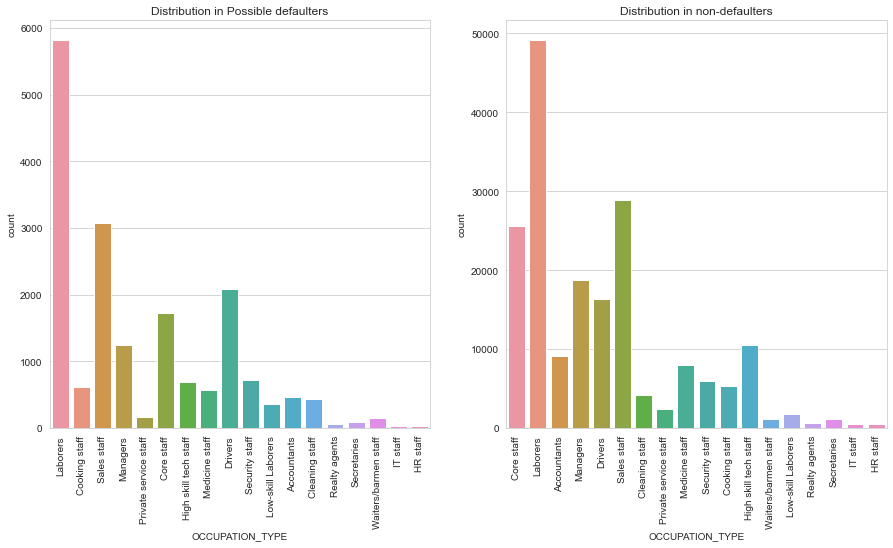

In [117]:
plt.figure(figsize=(15,7.5))

plt.subplot(1,2,1)
plt.title("Distribution in Possible defaulters")
plt.xticks(rotation = 90)
plt.title("Distribution in Possible defaulters")
sns.countplot('OCCUPATION_TYPE',data=df1);

plt.subplot(1,2,2)
plt.title("Distribution in non-defaulters")
plt.xticks(rotation = 90)
plt.title("Distribution in non-defaulters")
sns.countplot('OCCUPATION_TYPE',data=df0);

##### Inference

- From the above charts we can infer that among both types of clients highest proportion of Occupation Type is Laborers. 5822 possible defaulters' are Laborers and 49182 non defaulters are Labourers. 

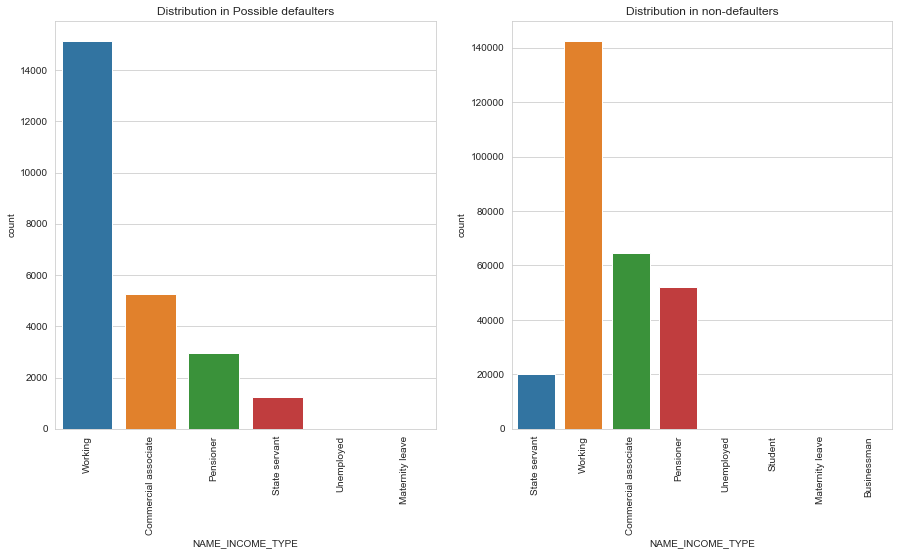

In [118]:
plt.figure(figsize=(15,7.5))

plt.subplot(1,2,1)
# plt.title('Churn')
plt.xticks(rotation = 90)
plt.title("Distribution in Possible defaulters")
sns.countplot('NAME_INCOME_TYPE',data=df1);

plt.subplot(1,2,2)
# plt.title('Non-Churn')
plt.xticks(rotation = 90)
plt.title("Distribution in non-defaulters")
sns.countplot('NAME_INCOME_TYPE',data=df0);

##### Inference

- From the above charts we can infer that among both types of clients highest proportion of Income Type is Working. 15154 possible defaulters' are Working and 142657 non defaulters are Working. 

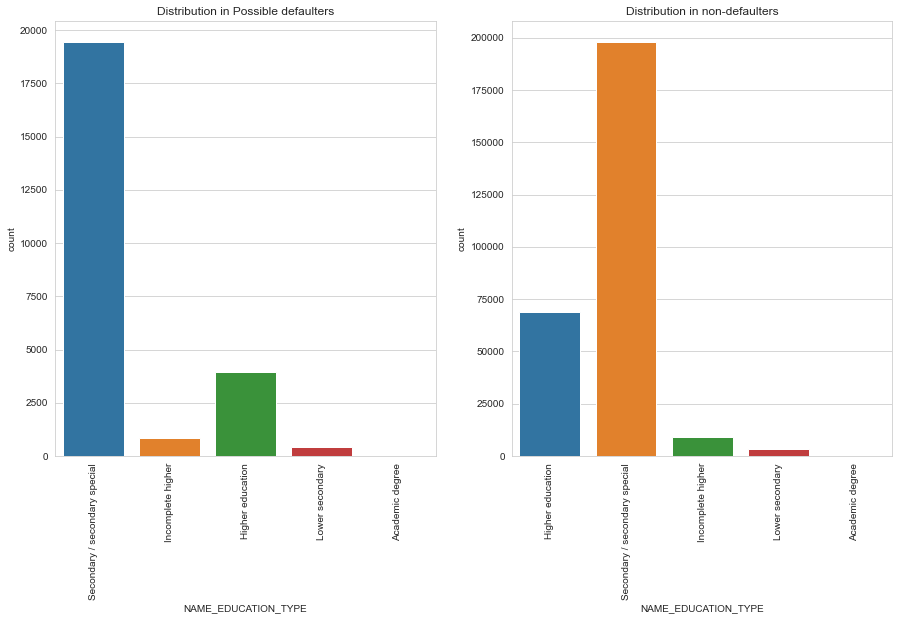

In [119]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
# plt.title('Churn')
plt.xticks(rotation = 90)
plt.title("Distribution in Possible defaulters")
sns.countplot('NAME_EDUCATION_TYPE',data=df1);

plt.subplot(1,2,2)
# plt.title('Non-Churn')
plt.xticks(rotation = 90)
plt.title("Distribution in non-defaulters")
sns.countplot('NAME_EDUCATION_TYPE',data=df0);

##### Inference

- From the above charts we can infer that among both types of clients highest proportion of Education Type is Secondary/secondary special. 19442 possible defaulters' have studied uptil Secondary/secondary special level and 198023 non defaulters have.



## Bivariate Analysis

#### Numerical-Numerical Variables

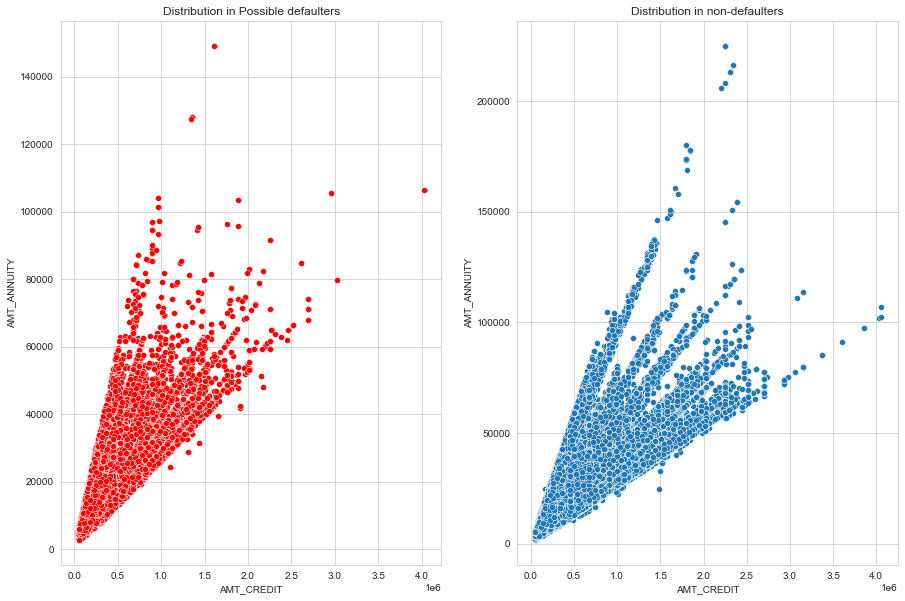

In [120]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("Distribution in Possible defaulters")
sns.scatterplot(df1['AMT_CREDIT'],df1['AMT_ANNUITY'], color = 'red');
plt.subplot(122)
plt.title("Distribution in non-defaulters")
sns.scatterplot(df0['AMT_CREDIT'],df0['AMT_ANNUITY']);

##### Inference

- From the above charts we can infer that the Credit amount of the loan and the Loan Annuity amount are highly correlated Variables

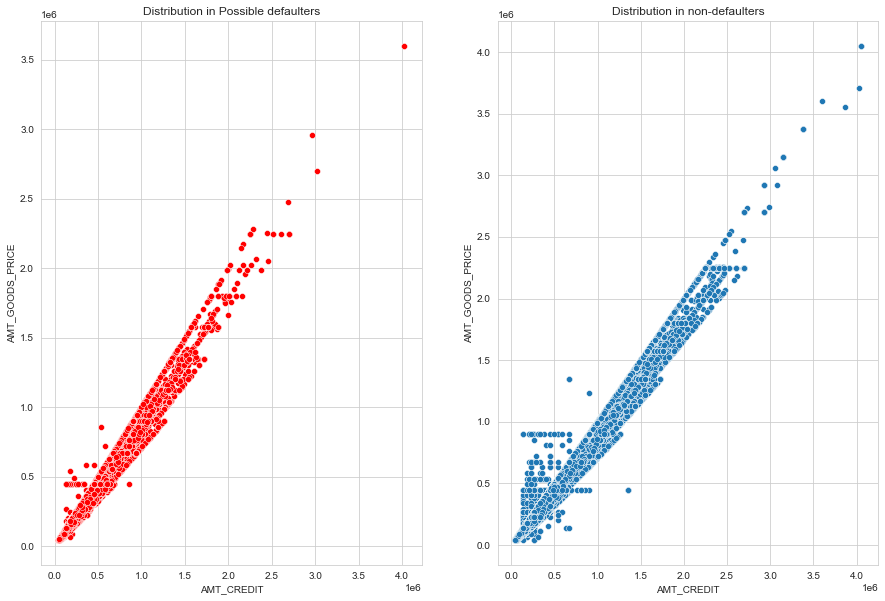

In [121]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("Distribution in Possible defaulters")
sns.scatterplot(df1['AMT_CREDIT'],df1['AMT_GOODS_PRICE'], color = 'red');
plt.subplot(122)
plt.title("Distribution in non-defaulters")
sns.scatterplot(df0['AMT_CREDIT'],df0['AMT_GOODS_PRICE']);

##### Inference

- From the above charts we can infer that the Credit amount of the loan and the Price of the goods for which the loan is given are highly correlated Variables

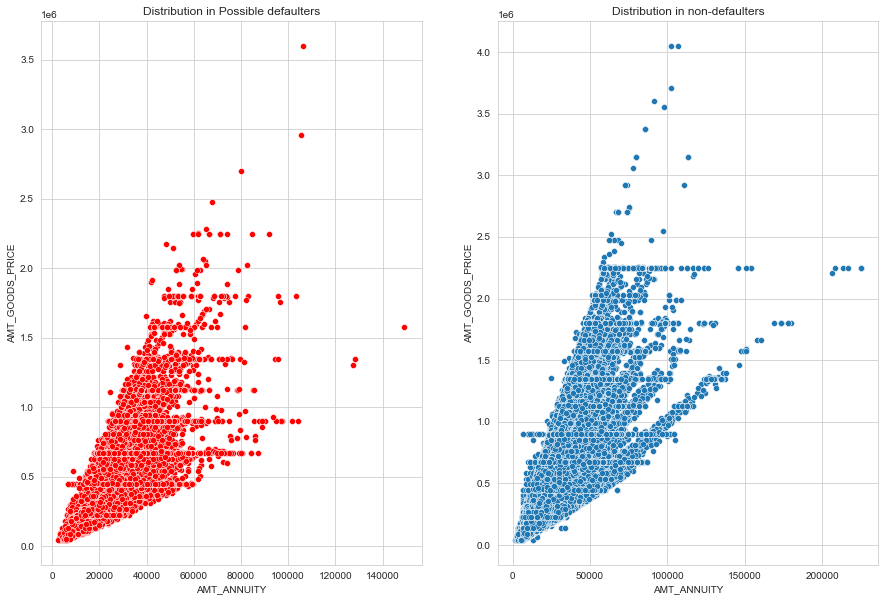

In [122]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.title("Distribution in Possible defaulters")
sns.scatterplot(df1['AMT_ANNUITY'],df1['AMT_GOODS_PRICE'], color = 'red');
plt.subplot(122)
plt.title("Distribution in non-defaulters")
sns.scatterplot(df0['AMT_ANNUITY'],df0['AMT_GOODS_PRICE']);

##### Inference

- From the above charts we can infer that the Loan Annuity amount and the Price of the goods for which the loan is given are also highly correlated Variables.

#### Numerical - Categorical

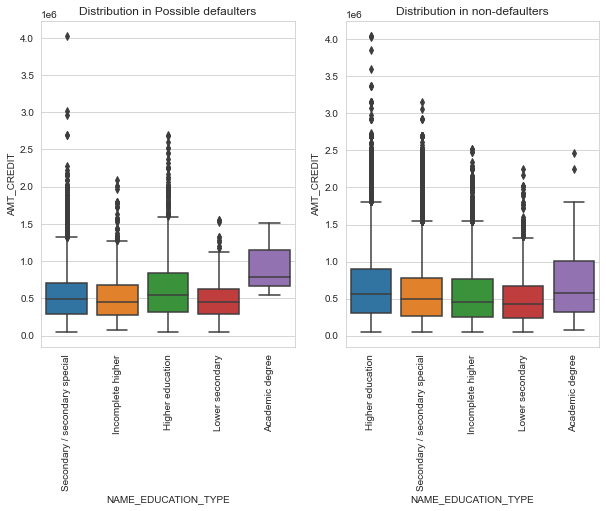

In [123]:
# box plot depicting goods price and education type

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.xticks(rotation = 90)
plt.title("Distribution in Possible defaulters") 
sns.boxplot(y='AMT_CREDIT',x='NAME_EDUCATION_TYPE',data=df1);

plt.subplot(1,2,2)
plt.xticks(rotation = 90)
plt.title("Distribution in non-defaulters")
sns.boxplot(y='AMT_CREDIT',x='NAME_EDUCATION_TYPE',data=df0);

##### Inference

- Comparing the two subplots we can infer that although for both types of clients the ones having Academic Degree have taken the highiest loan but both the 25th and 75th percentiles in the case of Possible defaulters are higher than non-defaulters. This means majority of possible defaulters have taken higher loans than the non-defaulters.


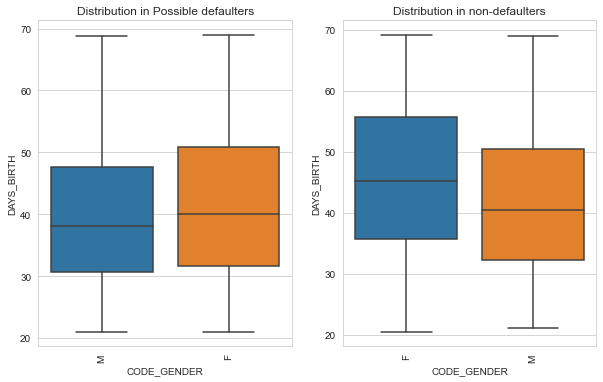

In [124]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.xticks(rotation = 90)
plt.title("Distribution in Possible defaulters") 
sns.boxplot(y='DAYS_BIRTH',x='CODE_GENDER',data=df1);

plt.subplot(1,2,2)
plt.xticks(rotation = 90)
plt.title("Distribution in non-defaulters")
sns.boxplot(y='DAYS_BIRTH',x='CODE_GENDER',data=df0);

##### Inference

- Comparing the two subplots we can infer that although for both types of clients the females have a highier upper-bound of age than the males , but for the Possible defaulters the females are approximately aged from early 30s to early 50s whereas for the non defaulters they are approximately aged from late 30s to mid 50s

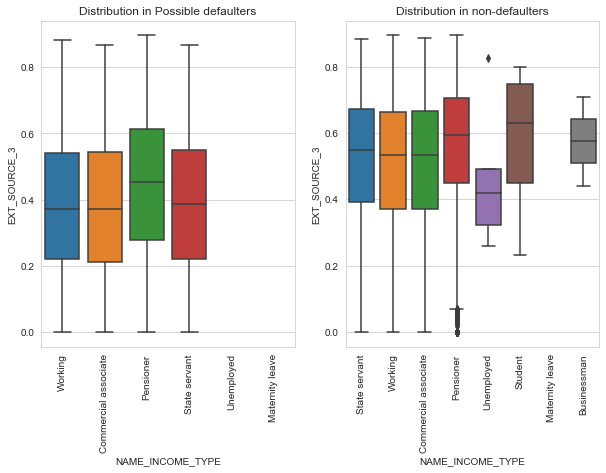

In [125]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.xticks(rotation = 90)
plt.title("Distribution in Possible defaulters") 
sns.boxplot(x='NAME_INCOME_TYPE',y='EXT_SOURCE_3',data=df1);

plt.subplot(1,2,2)
plt.xticks(rotation = 90)
plt.title("Distribution in non-defaulters")
sns.boxplot(x='NAME_INCOME_TYPE',y='EXT_SOURCE_3',data=df0);

##### Inference

- Comparing the two subplots we can infer that among the possible defaulters the high credit score-3  belongs to the Pesioners and among the non-defaulters the highiest credit score-3 belongs to the students. 
- Additionally we can see that the Possible defaulters have low credit scores (mostly between .2 and .55) while the non-defaulters have higher scredit scores (mostly betweeen .3 and .75)

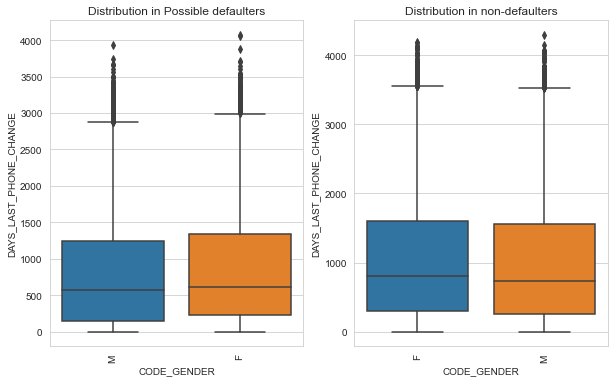

In [126]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.xticks(rotation = 90)
plt.title("Distribution in Possible defaulters")
sns.boxplot(x='CODE_GENDER',y='DAYS_LAST_PHONE_CHANGE',data=df1);

plt.subplot(1,2,2)
plt.xticks(rotation = 90)
plt.title("Distribution in non-defaulters")
sns.boxplot(x='CODE_GENDER',y='DAYS_LAST_PHONE_CHANGE',data=df0);

##### Inference

- Comparing the two subplots we can infer that the Possible defaulters have changed their phones more recently across both genders this shows less trustworthiness; incase of non-defaulters we see that such clients have changed their phones less recently, this shows more trustworthiness.

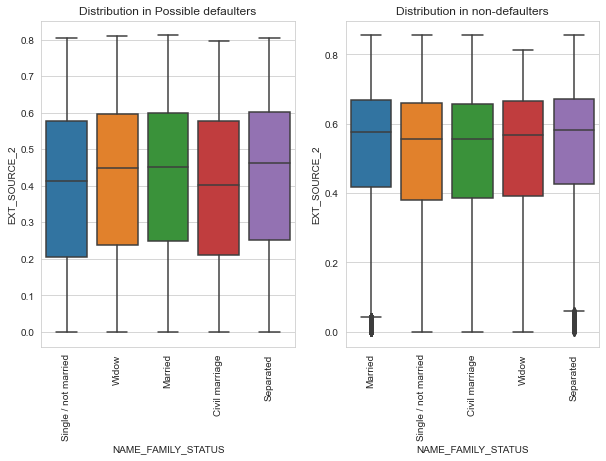

In [127]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.xticks(rotation = 90)
plt.title("Distribution in Possible defaulters")
sns.boxplot(x='NAME_FAMILY_STATUS',y='EXT_SOURCE_2',data=df1);

plt.subplot(1,2,2)
plt.xticks(rotation = 90)
plt.title("Distribution in non-defaulters")
sns.boxplot(x='NAME_FAMILY_STATUS',y='EXT_SOURCE_2',data=df0);

##### Inference

- Comparing the two subplots we can infer that for the possible defaulters across the kinds of family status the credit score-2 is low (ranging from 0.2 to 0.59) and in the case of

#### Categorical-Categorical

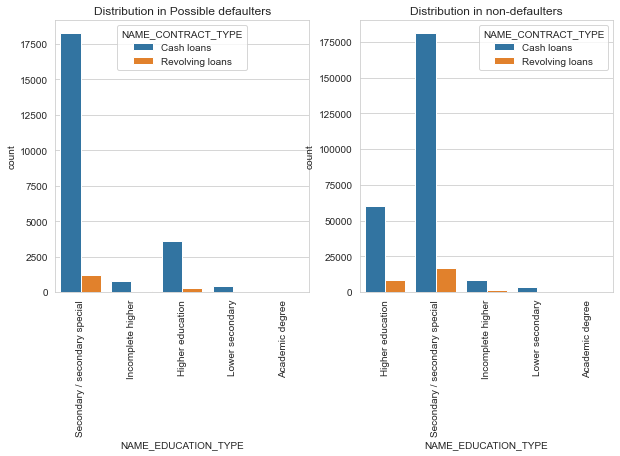

In [128]:
plt.figure(figsize = (10,5))

plt.subplot(121)
sns.countplot('NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_TYPE', data = df1);
plt.xticks(rotation = 90)
plt.title("Distribution in Possible defaulters")
plt.subplot(122)
plt.xticks(rotation = 90)
plt.title("Distribution in non-defaulters")
sns.countplot('NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_TYPE', data = df0);

##### Inference
- Applicants who have secondary education mostly prefer cash loans 

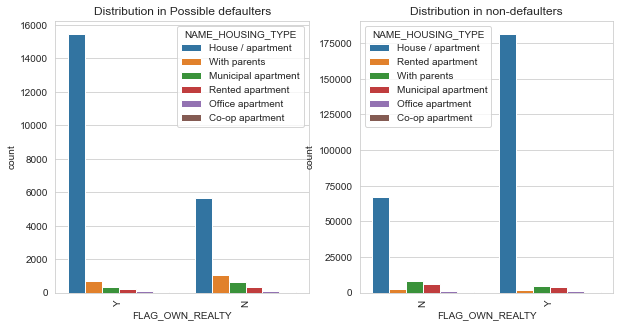

In [129]:
plt.figure(figsize = (10,5))

plt.subplot(121)
sns.countplot('FLAG_OWN_REALTY', hue = 'NAME_HOUSING_TYPE', data = df1);
plt.xticks(rotation = 90)
plt.title("Distribution in Possible defaulters")

plt.subplot(122)
plt.xticks(rotation = 90)
plt.title("Distribution in non-defaulters")
sns.countplot('FLAG_OWN_REALTY', hue = 'NAME_HOUSING_TYPE', data = df0);

##### Inference
- Possible defaulters mostly own a House/Apartment which is same as non-defaulters

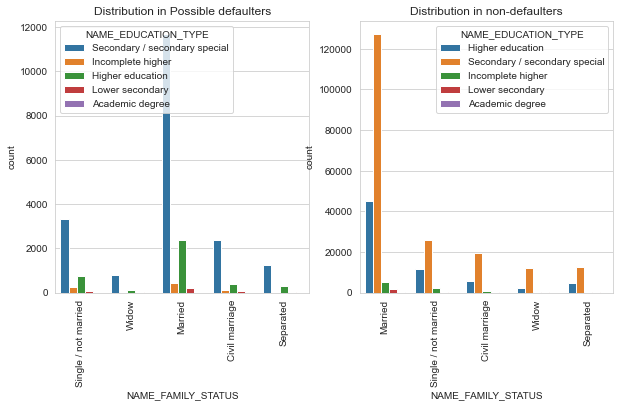

In [130]:
plt.figure(figsize = (10,5))

plt.subplot(121)
sns.countplot('NAME_FAMILY_STATUS', hue = 'NAME_EDUCATION_TYPE', data = df1);
plt.xticks(rotation = 90)
plt.title("Distribution in Possible defaulters")

plt.subplot(122)
plt.xticks(rotation = 90)
plt.title("Distribution in non-defaulters")
sns.countplot('NAME_FAMILY_STATUS', hue = 'NAME_EDUCATION_TYPE', data = df0);

##### Inference
- Applicants with family status is married and have higer education are most likely to default on loans


### SEGMENTED UNIVARIATE ANALYSIS (BY GENDER)

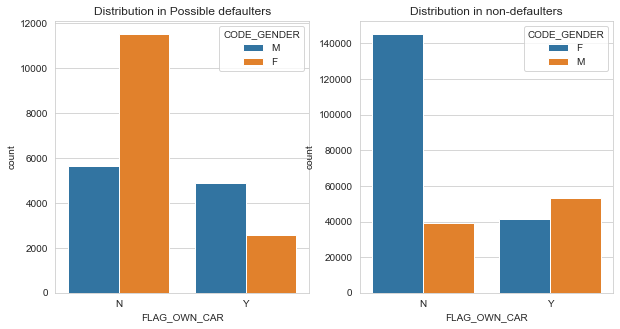

In [131]:
#Name contract type and gender
plt.figure(figsize = (10,5))

plt.subplot(121)
plt.title("Distribution in Possible defaulters")
sns.countplot('FLAG_OWN_CAR', hue = 'CODE_GENDER', data = df1);

plt.subplot(122)
plt.title("Distribution in non-defaulters")
sns.countplot('FLAG_OWN_CAR', hue = 'CODE_GENDER', data = df0);

### Inference
- The graph shows that most females who are likely to default do not own a car
- Most Males who are non-defaulters do not own a car. 

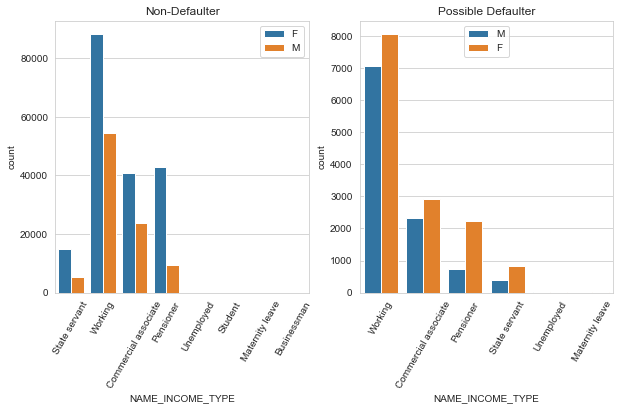

In [132]:
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.countplot(x=df0["NAME_INCOME_TYPE"], hue =df0['CODE_GENDER'])
plt.xticks(rotation = 60)
plt.title("Non-Defaulter")
plt.legend();

plt.subplot(122)
sns.countplot(x=df1["NAME_INCOME_TYPE"], hue =df1['CODE_GENDER'])
plt.xticks(rotation = 60)
plt.title("Possible Defaulter")
plt.legend();

##### Inference

- Female working category are the highest ones who could be potential defaulters

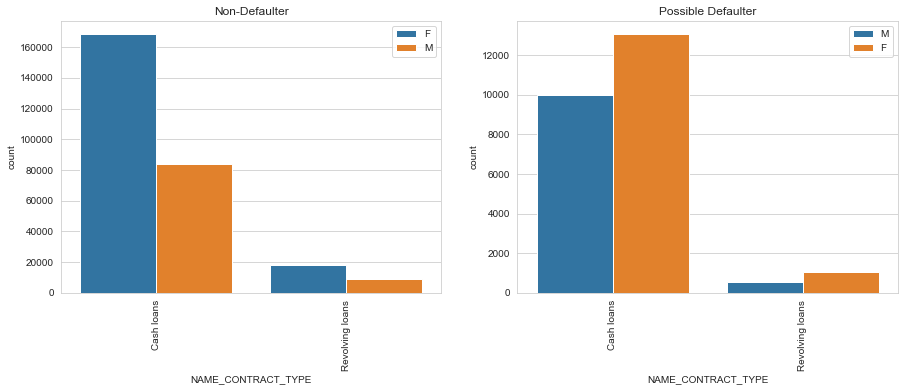

In [133]:
plt.figure(figsize=[15,5])
plt.subplot(121)
sns.countplot(x=df0["NAME_CONTRACT_TYPE"], hue =df0['CODE_GENDER'])
plt.xticks(rotation = 90)
plt.title("Non-Defaulter")
plt.legend();

plt.subplot(122)
sns.countplot(x=df1["NAME_CONTRACT_TYPE"], hue =df1['CODE_GENDER'])
plt.xticks(rotation = 90)
plt.title("Possible Defaulter")
plt.legend();

#### Inference
- For both types of clients Females have taken more cash and revolving loans



## Multivariate Analysis using heatmap

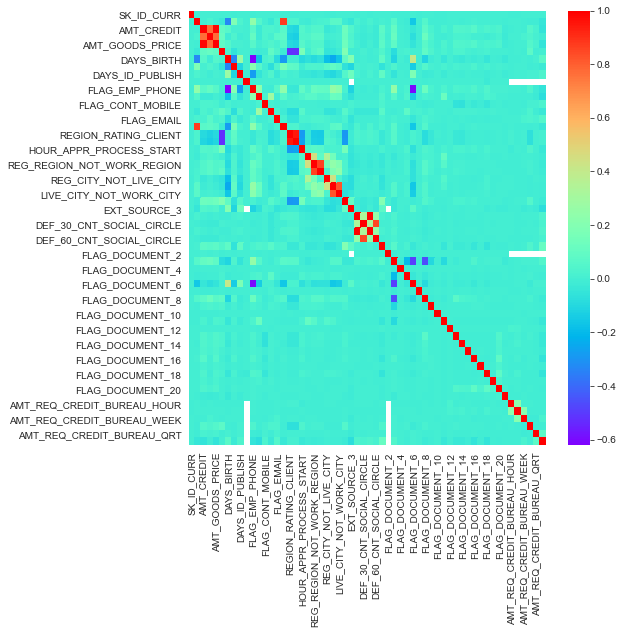

In [134]:
app_heatmap = app_data.corr()   
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(app_heatmap, ax = ax, cmap ="rainbow") 
plt.show();

## Loading and Viewing PREVIOUS APPLICATION DATASET

In [135]:
#Loading the file
prev_data = pd.read_csv("previous_application.csv")

In [136]:
#Checking first 5 rows of the dataframe
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,nan,607500.00,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,nan,112500.00,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,nan,450000.00,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,nan,337500.00,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [137]:
#Number of rows and columns in the dataframe
prev_data.shape

(1670214, 37)

In [138]:
#Inspecting the numerical columns by rounding it upto 2 decimal places
prev_data.describe().round(2)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00,1670214.00,1297979.00,1670214.00,1670213.00,774370.00,1284699.00,1670214.00,1670214.00,774370.00,5951.00,5951.00,1670214.00,1670214.00,1297984.00,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00
mean,1923089.14,278357.17,15955.12,175233.86,196114.02,6697.40,227847.28,12.48,1.00,0.08,0.19,0.77,-880.68,313.95,16.05,342209.86,13826.27,33767.77,76582.40,81992.34,0.33
std,532597.96,102814.82,14782.14,292779.76,318574.62,20921.50,315396.56,3.33,0.06,0.11,0.09,0.10,779.10,7127.44,14.57,88916.12,72444.87,106857.03,149647.42,153303.52,0.47
min,1000001.00,100001.00,0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,0.03,0.37,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461857.25,189329.00,6321.78,18720.00,24160.50,0.00,50841.00,10.00,1.00,0.00,0.16,0.72,-1300.00,-1.00,6.00,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00
50%,1923110.50,278714.50,11250.00,71046.00,80541.00,1638.00,112320.00,12.00,1.00,0.05,0.19,0.84,-581.00,3.00,12.00,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
75%,2384279.75,367514.00,20658.42,180360.00,216418.50,7740.00,234000.00,15.00,1.00,0.11,0.19,0.85,-280.00,82.00,24.00,365243.00,-411.00,129.00,-74.00,-44.00,1.00
max,2845382.00,456255.00,418058.14,6905160.00,6905160.00,3060045.00,6905160.00,23.00,1.00,1.00,1.00,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


In [139]:
# inspecting dataframe for unique values
prev_data.nunique()

SK_ID_PREV                     1670214
SK_ID_CURR                      338857
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     357959
AMT_APPLICATION                  93885
AMT_CREDIT                       86803
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93885
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

In [140]:
# making sure to drop duplicates
prev_data.drop_duplicates()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,nan,607500.00,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,nan,112500.00,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,nan,450000.00,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,nan,337500.00,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.29,267295.50,311400.00,0.00,267295.50,WEDNESDAY,12,Y,1,0.00,nan,nan,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.00,low_normal,POS industry with interest,365243.00,-508.00,362.00,-358.00,-351.00,0.00
1670210,2357031,334635,Consumer loans,6622.02,87750.00,64291.50,29250.00,87750.00,TUESDAY,15,Y,1,0.34,nan,nan,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.00,middle,POS industry with interest,365243.00,-1604.00,-1274.00,-1304.00,-1297.00,0.00
1670211,2659632,249544,Consumer loans,11520.85,105237.00,102523.50,10525.50,105237.00,MONDAY,12,Y,1,0.10,nan,nan,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.00,low_normal,POS household with interest,365243.00,-1457.00,-1187.00,-1187.00,-1181.00,0.00
1670212,2785582,400317,Cash loans,18821.52,180000.00,191880.00,nan,180000.00,WEDNESDAY,9,Y,1,nan,nan,nan,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.00,low_normal,Cash X-Sell: low,365243.00,-1155.00,-825.00,-825.00,-817.00,1.00


In [141]:
#Summary of the dataframe
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Converting the datatypes

In [142]:
#converting some columns from float to integer

prev_data.DAYS_FIRST_DUE = prev_data.DAYS_FIRST_DUE.astype(pd.Int64Dtype())
prev_data.DAYS_LAST_DUE_1ST_VERSION = prev_data.DAYS_LAST_DUE_1ST_VERSION.astype(pd.Int64Dtype())
prev_data.DAYS_LAST_DUE = prev_data.DAYS_LAST_DUE.astype(pd.Int64Dtype())
prev_data.DAYS_TERMINATION = prev_data.DAYS_TERMINATION.astype(pd.Int64Dtype())

In [143]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [144]:
#Filtering columns which have more than 50% missing values
missing_50 = prev_data.columns[prev_data.isnull().sum()/len(prev_data)*100>50]
missing_50

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

In [145]:
#Dropping 2 columns which have more than 50% missing values
prev_data = prev_data.drop(missing_50, axis=1)

In [146]:
#Confirming if the columns have been dropped
prev_data.shape

(1670214, 33)

In [147]:
# checking numerical columns summary
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00,1670214.00,1297979.00,1670214.00,1670213.00,1284699.00,1670214.00,1670214.00,1670214.00,1670214.00,1297984.00,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00
mean,1923089.14,278357.17,15955.12,175233.86,196114.02,227847.28,12.48,1.00,-880.68,313.95,16.05,342209.86,13826.27,33767.77,76582.40,81992.34,0.33
std,532597.96,102814.82,14782.14,292779.76,318574.62,315396.56,3.33,0.06,779.10,7127.44,14.57,88916.12,72444.87,106857.03,149647.42,153303.52,0.47
min,1000001.00,100001.00,0.00,0.00,0.00,0.00,0.00,0.00,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461857.25,189329.00,6321.78,18720.00,24160.50,50841.00,10.00,1.00,-1300.00,-1.00,6.00,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00
50%,1923110.50,278714.50,11250.00,71046.00,80541.00,112320.00,12.00,1.00,-581.00,3.00,12.00,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
75%,2384279.75,367514.00,20658.42,180360.00,216418.50,234000.00,15.00,1.00,-280.00,82.00,24.00,365243.00,-411.00,129.00,-74.00,-44.00,1.00
max,2845382.00,456255.00,418058.15,6905160.00,6905160.00,6905160.00,23.00,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


In [148]:
#Percentage of missing values
prev_data.isnull().sum()/len(prev_data)*100

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   22.29
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_GOODS_PRICE               23.08
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_TYPE_SUITE               49.12
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
CNT_PAYMENT                   22.29
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
DAYS_FIRST_DRAWING          

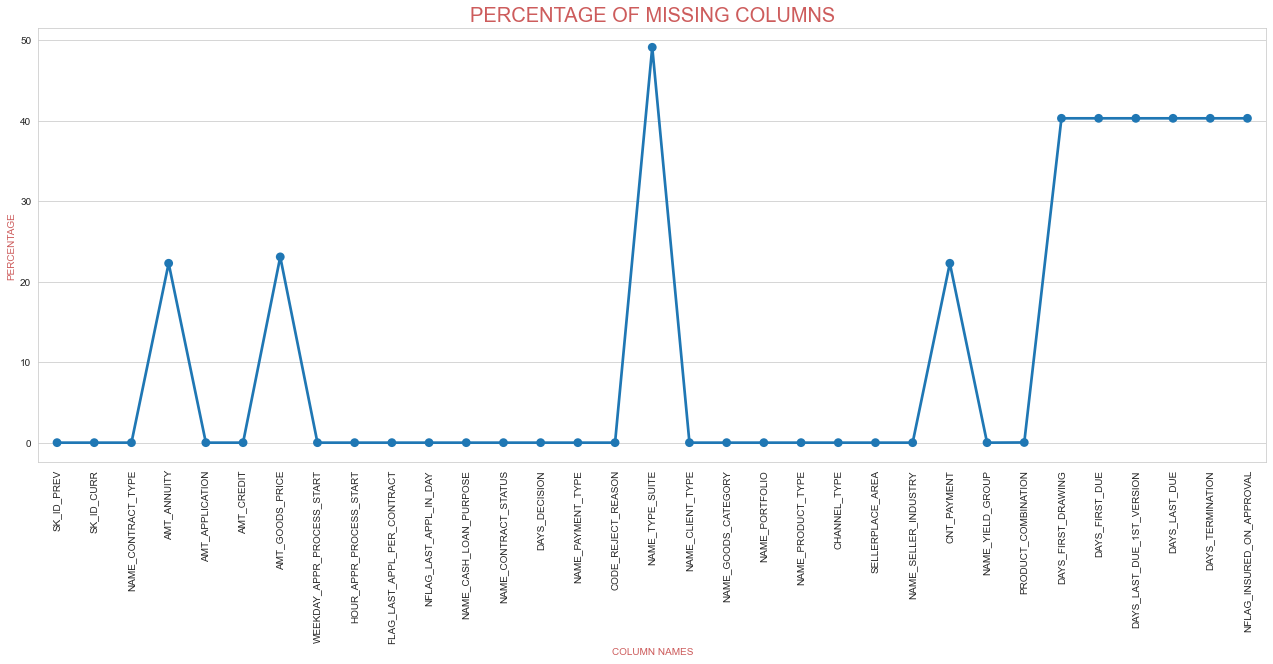

In [149]:
#Plotting missing values of the dataframe - previous_application data

sns.set_style('whitegrid')

fig = plt.figure(figsize=(22,8))
miss_prev_data = pd.DataFrame((prev_data.isnull().sum())*100/prev_data.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=miss_prev_data)

plt.xticks(rotation =90);
plt.xlabel('COLUMN NAMES', fontdict = {'color':'indianred','fontsize':10})
plt.ylabel('PERCENTAGE',  fontdict = {'color':'indianred','fontsize':10})
plt.title("PERCENTAGE OF MISSING COLUMNS",  fontdict = {'color':'indianred','fontsize':20});

## Imputing Missing Values for the columns

In [150]:
#To supress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' %x)

prev_data.AMT_ANNUITY.isnull().sum()

372235

In [151]:
prev_data.AMT_ANNUITY.describe()

count   1297979.00
mean      15955.12
std       14782.14
min           0.00
25%        6321.78
50%       11250.00
75%       20658.42
max      418058.15
Name: AMT_ANNUITY, dtype: float64

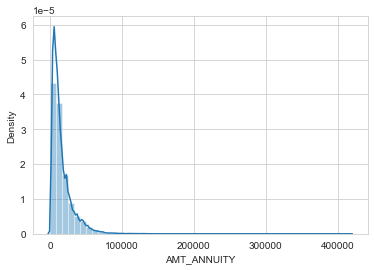

In [152]:
sns.set_style('whitegrid')
sns.distplot(prev_data.AMT_ANNUITY);

In [153]:
prev_data.AMT_ANNUITY.fillna(11250, inplace=True)

Comment:
We have filled nan with Median of this field i.e,11250  as the plot is right skewed

In [154]:
prev_data.AMT_GOODS_PRICE.isnull().sum()

385515

In [155]:
prev_data.AMT_GOODS_PRICE.describe()

count   1284699.00
mean     227847.28
std      315396.56
min           0.00
25%       50841.00
50%      112320.00
75%      234000.00
max     6905160.00
Name: AMT_GOODS_PRICE, dtype: float64

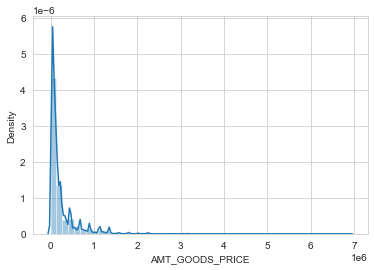

In [156]:
sns.distplot(prev_data.AMT_GOODS_PRICE);

In [157]:
prev_data.AMT_GOODS_PRICE.fillna(112320, inplace=True)

Comment: We have filled nan with Median of this field i.e, 112320 as the plot is right skewed

In [158]:
prev_data.CNT_PAYMENT.isnull().sum()

372230

In [159]:
prev_data.CNT_PAYMENT.describe()

count   1297984.00
mean         16.05
std          14.57
min           0.00
25%           6.00
50%          12.00
75%          24.00
max          84.00
Name: CNT_PAYMENT, dtype: float64

In [160]:
prev_data.CNT_PAYMENT.fillna(12, inplace= True)

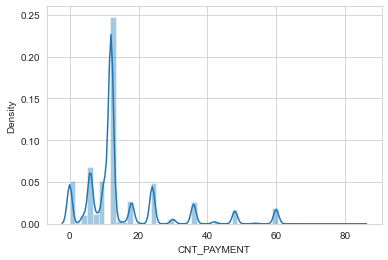

In [161]:
sns.distplot(prev_data.CNT_PAYMENT);

Comment: We have filled nan with Median of this field i.e,12 as the graph is right skewed

In [162]:
prev_data.NAME_TYPE_SUITE.isnull().sum()

820405

In [163]:
prev_data.NAME_TYPE_SUITE.describe()

count            849809
unique                7
top       Unaccompanied
freq             508970
Name: NAME_TYPE_SUITE, dtype: object

In [164]:
prev_data.NAME_TYPE_SUITE.fillna('Unaccompanied', inplace = True)

Comment: We have filled NA with 'Unaccompanied' i.e, the mode of the column

In [165]:
prev_data.PRODUCT_COMBINATION.isnull().sum()

346

In [166]:
prev_data.PRODUCT_COMBINATION.describe()

count     1669868
unique         17
top          Cash
freq       285990
Name: PRODUCT_COMBINATION, dtype: object

In [167]:
prev_data.PRODUCT_COMBINATION.fillna('Cash', inplace=True)

Comment: We have filled NA with 'Cash' i.e, the mode of the column

In [168]:
prev_data.DAYS_FIRST_DRAWING.isnull().sum()

673065

In [169]:
prev_data.DAYS_FIRST_DRAWING.describe()

count   997149.00
mean    342209.86
std      88916.12
min      -2922.00
25%     365243.00
50%     365243.00
75%     365243.00
max     365243.00
Name: DAYS_FIRST_DRAWING, dtype: float64

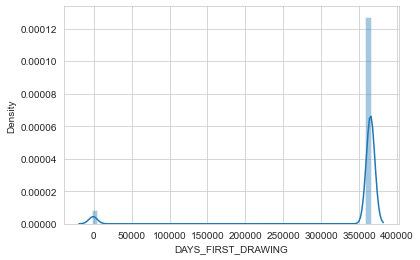

In [170]:
sns.distplot(prev_data.DAYS_FIRST_DRAWING);

In [171]:
prev_data.DAYS_FIRST_DRAWING.fillna('365243', inplace=True)

Comment : We have filled NA with Median of this field i.e, 365243

## Seperating Categorical and Numerical Columns in previous_application.csv

In [172]:
Numerical = prev_data.select_dtypes(include = (np.number)).columns
Categorical =prev_data.select_dtypes(exclude = (np.number)).columns

In [173]:
for x in Numerical:
    print(x)

SK_ID_PREV
SK_ID_CURR
AMT_ANNUITY
AMT_APPLICATION
AMT_CREDIT
AMT_GOODS_PRICE
HOUR_APPR_PROCESS_START
NFLAG_LAST_APPL_IN_DAY
DAYS_DECISION
SELLERPLACE_AREA
CNT_PAYMENT
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL


In [174]:
for x in Categorical:
    print(x)

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING


## OUTLIER TREATMENT
#### Outliers can be identified using one'all following methods:
- BOXPLOT
- DESCRIBE FUNCTION
- PERCENTILE/QUANTILE FUNCTION

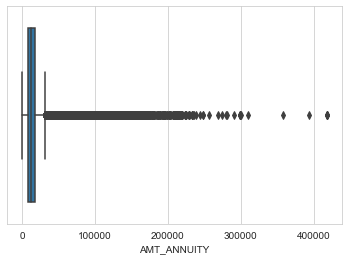

In [175]:
sns.boxplot(prev_data.AMT_ANNUITY);

In [176]:
prev_data.AMT_ANNUITY.describe()

count   1670214.00
mean      14906.51
std       13177.51
min           0.00
25%        7547.10
50%       11250.00
75%       16824.03
max      418058.15
Name: AMT_ANNUITY, dtype: float64

In [177]:
prev_data.AMT_ANNUITY.quantile((0.5,0.75,0.9,0.95,0.99,1))

0.50    11250.00
0.75    16824.03
0.90    30219.93
0.95    41963.89
0.99    65758.50
1.00   418058.15
Name: AMT_ANNUITY, dtype: float64

#### Suggestion:

- We can see the differences between the 99th percentile value and the maximum value using quantile function. We can even visually see these outliers through the boxplot. 
- This can be considered as a special value and outliers can be treated by capping the values at 99th percentile.
- Or we can choose not to treat them, and instead just be aware of the situation and let them be left untreated. Thus whenever we are aggregating/analysing these values, instead of looking at the mean, we can look at percentiles/medians so we dont get affected by outliers.
- Such a decision is dependant on a case by case basis according to the business problem.

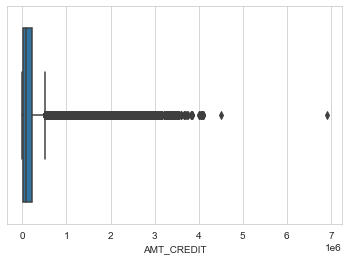

In [178]:
sns.boxplot(prev_data.AMT_CREDIT);

In [179]:
prev_data.AMT_CREDIT.describe()

count   1670213.00
mean     196114.02
std      318574.62
min           0.00
25%       24160.50
50%       80541.00
75%      216418.50
max     6905160.00
Name: AMT_CREDIT, dtype: float64

In [180]:
prev_data.AMT_CREDIT.quantile((0.5,0.75,0.9,0.95,0.99,1))

0.50     80541.00
0.75    216418.50
0.90    533160.00
0.95    886500.00
0.99   1515377.70
1.00   6905160.00
Name: AMT_CREDIT, dtype: float64

#### Suggestion:

- We can see the differences between the 99th percentile value and the maximum value using quantile function. We can even visually see these outliers through the boxplot. 
- This can be considered as a special value and outliers can be treated by capping the values at 99th percentile.
- Or we can choose not to treat them, and instead just be aware of the situation and let them be left untreated. Thus whenever we are aggregating/analysing these values, instead of looking at the mean, we can look at percentiles/medians so we dont get affected by outliers.
- Such a decision is dependant on a case by case basis according to the business problem.

## MERGING THE TWO DATAFRAMES

In [181]:
df_combined= pd.merge(app_data, prev_data, on='SK_ID_CURR', how='inner')

#### Checking the imbalance percentage

In [182]:
df_combined.TARGET.value_counts()

0    1279711
1     121497
Name: TARGET, dtype: int64

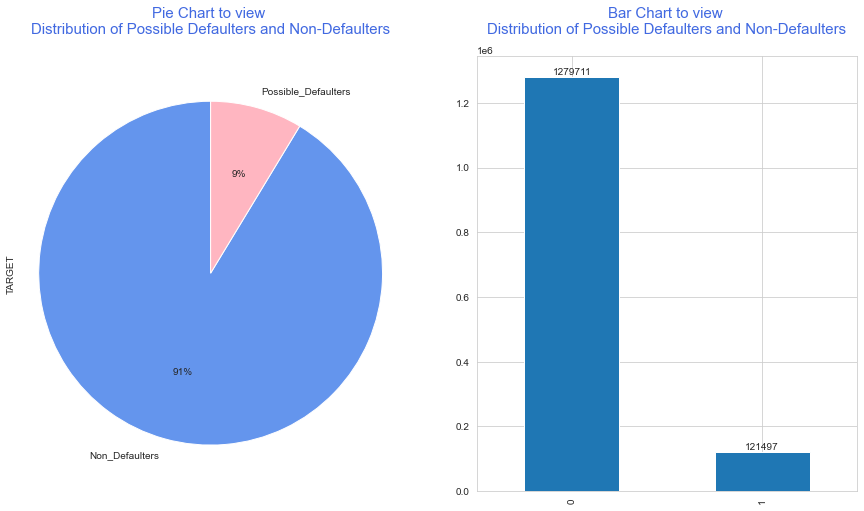

In [183]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
my_labels = 'Non_Defaulters','Possible_Defaulters'
df_combined.TARGET.value_counts(normalize = True).plot( kind = 'pie',autopct = '%1.0f%%', labels = my_labels , colors = ['cornflowerblue','lightpink'],startangle=90)
plt.title("Pie Chart to view \nDistribution of Possible Defaulters and Non-Defaulters\n", fontdict = {'color' :'royalblue', 'fontsize':15} )
plt.axis('equal');

plt.subplot(1,2,2)
splot = df_combined.TARGET.value_counts().plot(kind = 'bar')
plt.title("Bar Chart to view \nDistribution of Possible Defaulters and Non-Defaulters\n", fontdict = {'color' :'royalblue', 'fontsize':15} )
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points');

##### Inference:

We can see a data imbalance here. We see that 91% customers are not likely to be defaulters and 9% are possible defaulters (clients with payment difficulties).

#### Correlation between variables using heatmap

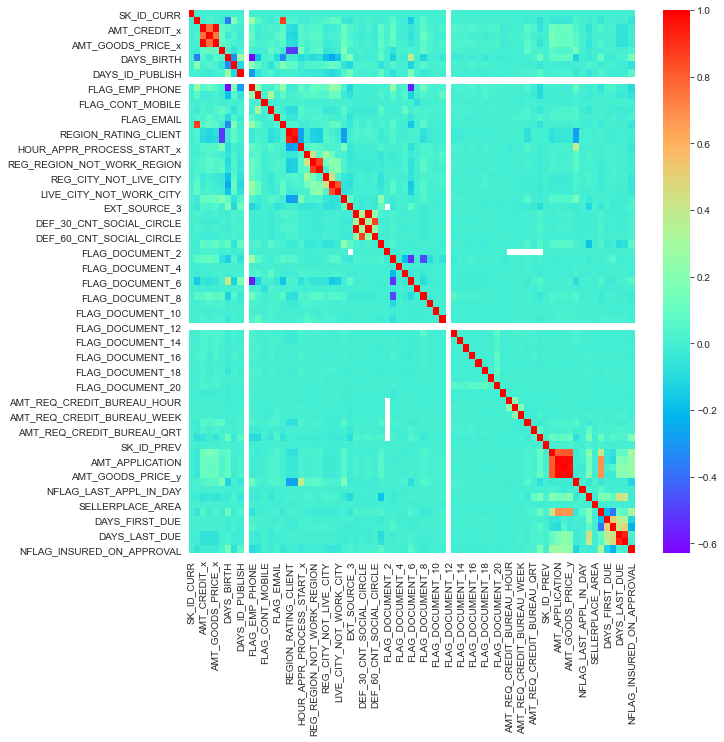

In [184]:
corrmap = df_combined.corr() 
plt.figure(figsize = (10,10))
sns.heatmap(corrmap, cmap ="rainbow") 
plt.show()    

#### Seperating the dataframe 

In [185]:
df_combined_1 = df_combined[df_combined['TARGET'] == "1"]
df_combined_0 = df_combined[df_combined['TARGET'] == "0"]

In [186]:
#Correlation between variables with respect to target variable 1
corr0 = df_combined_1.corr().unstack().sort_values(ascending = False)
corr0 = corr0[corr0 != 1.00]
corr0 = corr0[corr0 > 0.70]
corr0.head(10)

OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE   1.00
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE   1.00
AMT_APPLICATION           AMT_GOODS_PRICE_y          0.99
AMT_GOODS_PRICE_y         AMT_APPLICATION            0.99
AMT_GOODS_PRICE_x         AMT_CREDIT_x               0.98
AMT_CREDIT_x              AMT_GOODS_PRICE_x          0.98
AMT_CREDIT_y              AMT_APPLICATION            0.97
AMT_APPLICATION           AMT_CREDIT_y               0.97
AMT_GOODS_PRICE_y         AMT_CREDIT_y               0.97
AMT_CREDIT_y              AMT_GOODS_PRICE_y          0.97
dtype: float64

In [187]:
#Correlation between variables with respect to target variable 0
corr0 = df_combined_0.corr().unstack().sort_values(ascending = False)
corr0 = corr0[corr0 != 1.00]
corr0 = corr0[corr0 > 0.70]
corr0.head(10)

OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE   1.00
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE   1.00
AMT_APPLICATION           AMT_GOODS_PRICE_y          0.99
AMT_GOODS_PRICE_y         AMT_APPLICATION            0.99
AMT_GOODS_PRICE_x         AMT_CREDIT_x               0.99
AMT_CREDIT_x              AMT_GOODS_PRICE_x          0.99
AMT_CREDIT_y              AMT_APPLICATION            0.98
AMT_APPLICATION           AMT_CREDIT_y               0.98
AMT_CREDIT_y              AMT_GOODS_PRICE_y          0.97
AMT_GOODS_PRICE_y         AMT_CREDIT_y               0.97
dtype: float64

#### UNIVARIATE ANALYSIS

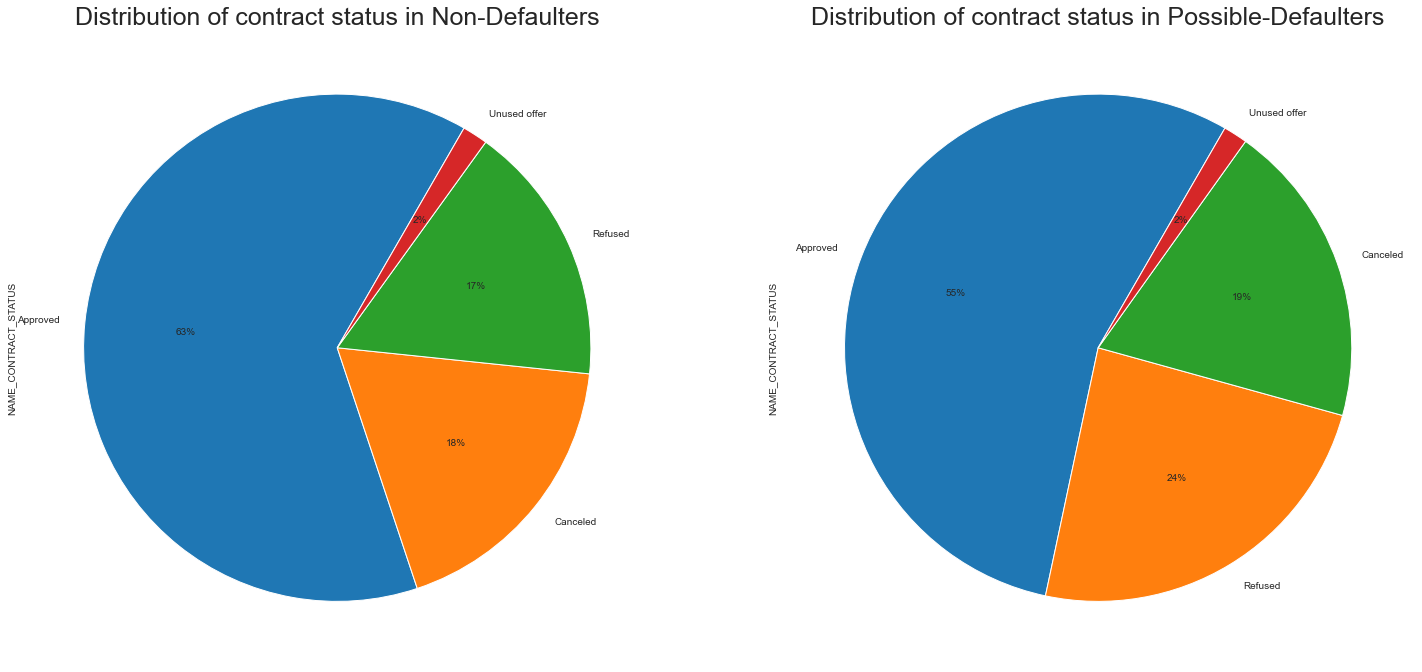

In [188]:
plt.figure(figsize = (25,25))
plt.subplot(121)
df_combined_0.NAME_CONTRACT_STATUS.value_counts().plot.pie(autopct = '%1.0f%%', startangle = 60)
plt.title("Distribution of contract status in Non-Defaulters", fontdict = {'fontsize':25});
plt.subplot(122)
df_combined_1.NAME_CONTRACT_STATUS.value_counts().plot.pie(autopct = '%1.0f%%', startangle = 60)
plt.title("Distribution of contract status in Possible-Defaulters", fontdict = {'fontsize':25});

###### Inference

- Non-defaulters cancelled applications are more than refused
- Possible-Defaulters refused applications are more than cancelled

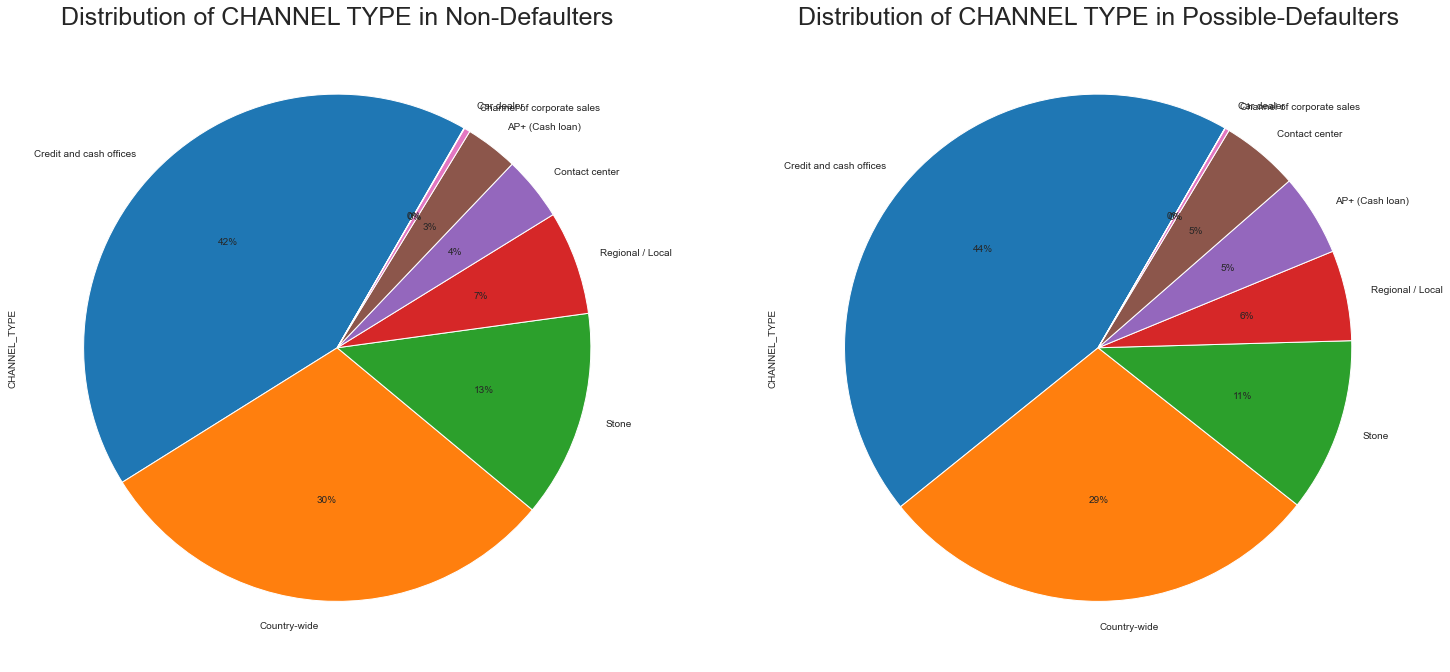

In [189]:
plt.figure(figsize = (25,25))
plt.subplot(121)
df_combined_0.CHANNEL_TYPE.value_counts().plot.pie(autopct = '%1.0f%%', startangle = 60)
plt.title("Distribution of CHANNEL TYPE in Non-Defaulters", fontdict = {'fontsize':25});
plt.subplot(122)
df_combined_1.CHANNEL_TYPE.value_counts().plot.pie(autopct = '%1.0f%%', startangle = 60)
plt.title("Distribution of CHANNEL TYPE in Possible-Defaulters", fontdict = {'fontsize':25});

##### Inference

- Credit and cash offices are types through which clients were previously acquired

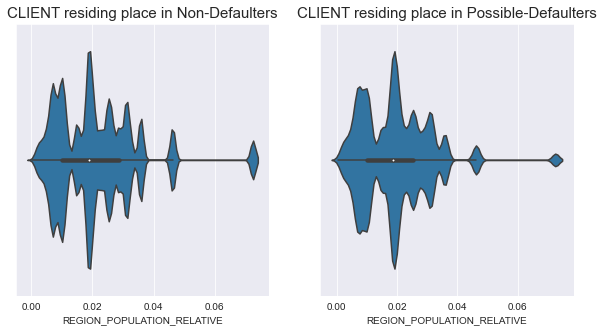

In [190]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sns.violinplot(df_combined_0["REGION_POPULATION_RELATIVE"])
plt.title("CLIENT residing place in Non-Defaulters", fontdict = {'fontsize':15});
plt.subplot(122)
sns.violinplot("REGION_POPULATION_RELATIVE", data = df_combined_1)
plt.title("CLIENT residing place in Possible-Defaulters", fontdict = {'fontsize':15});

###### Inference
- In region with high population density, clients are less likely to default on loans

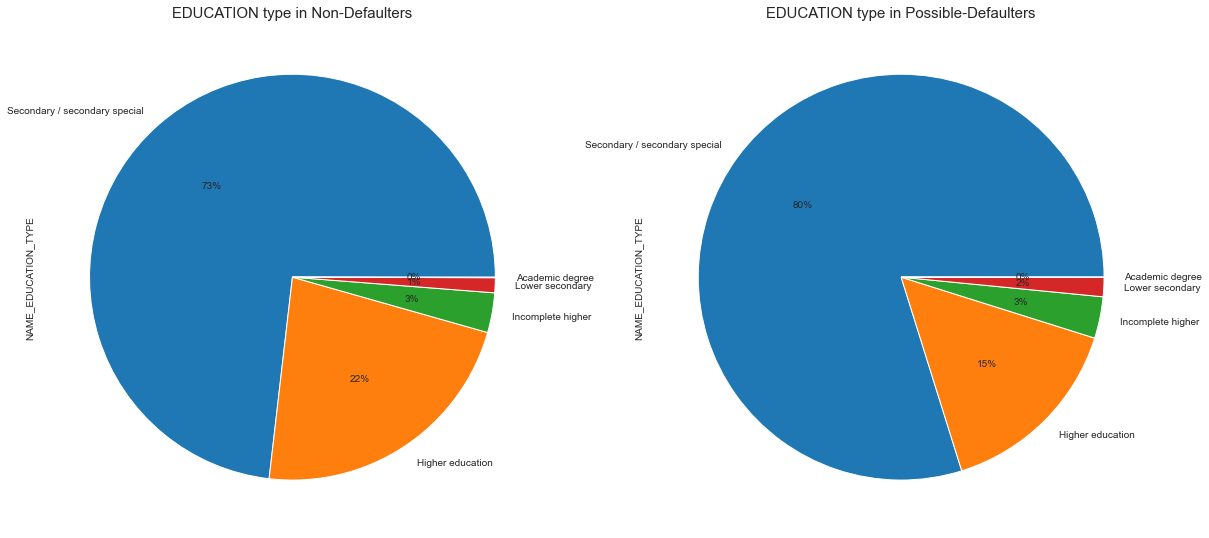

In [191]:
plt.figure(figsize = (20,15))
plt.subplot(121)
df_combined_0.NAME_EDUCATION_TYPE.value_counts().plot.pie(autopct = '%1.0f%%', fontsize=10)
plt.title("EDUCATION type in Non-Defaulters", fontdict = {'fontsize':15});
plt.subplot(122)
df_combined_1.NAME_EDUCATION_TYPE.value_counts().plot.pie(autopct = '%1.0f%%',fontsize=10)
plt.title("EDUCATION type in Possible-Defaulters", fontdict = {'fontsize':15});

##### Inference
- Secondary education applicants are 7% more likely to be possible - defaulters when compared with non-defaulters
- Higher Education applicants are 7% more likely to be non-defaulters

### BIVARIATE ANALYSIS

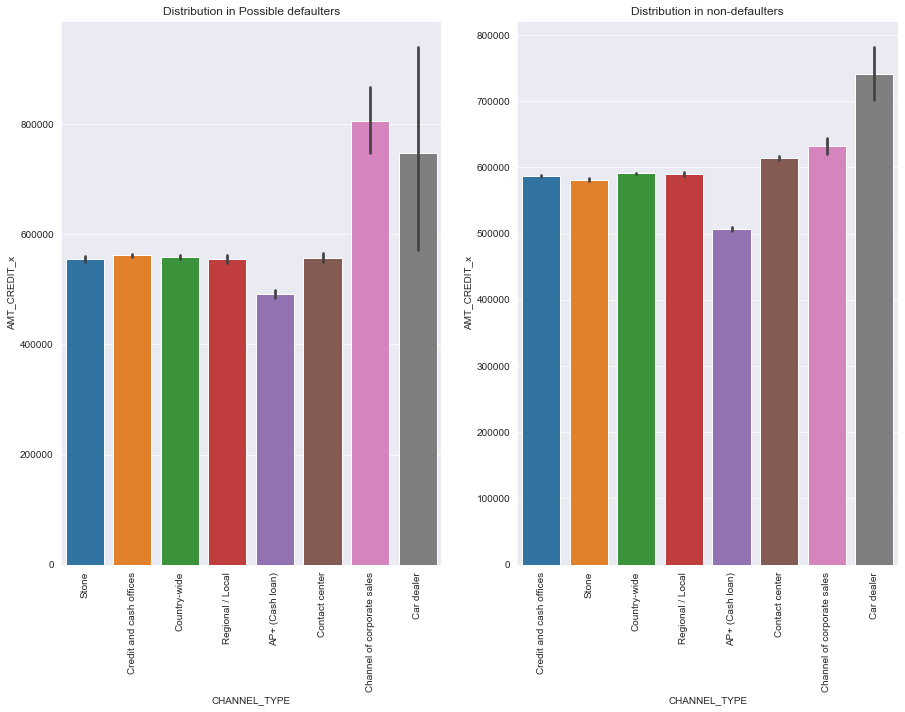

In [192]:
plt.figure(figsize=(15,10))

plt.subplot(121)
plt.title("Distribution in Possible defaulters")
sns.barplot(x = 'CHANNEL_TYPE',y = 'AMT_CREDIT_x', data = df_combined_1)
plt.xticks(rotation = 90);

plt.subplot(122)
plt.title("Distribution in non-defaulters")
sns.barplot(x = 'CHANNEL_TYPE', y = 'AMT_CREDIT_x', data =df_combined_0)
plt.xticks(rotation = 90);

##### Inference
- We can see that Car dealer loan of extremely high credit are among non-defaulters. Whereas those clients aquired through corporate sales who have taken extemely high credit are likely to be defaulters. Bank should make a note of this to avoid rejecting/accepting applications of the wrong profile

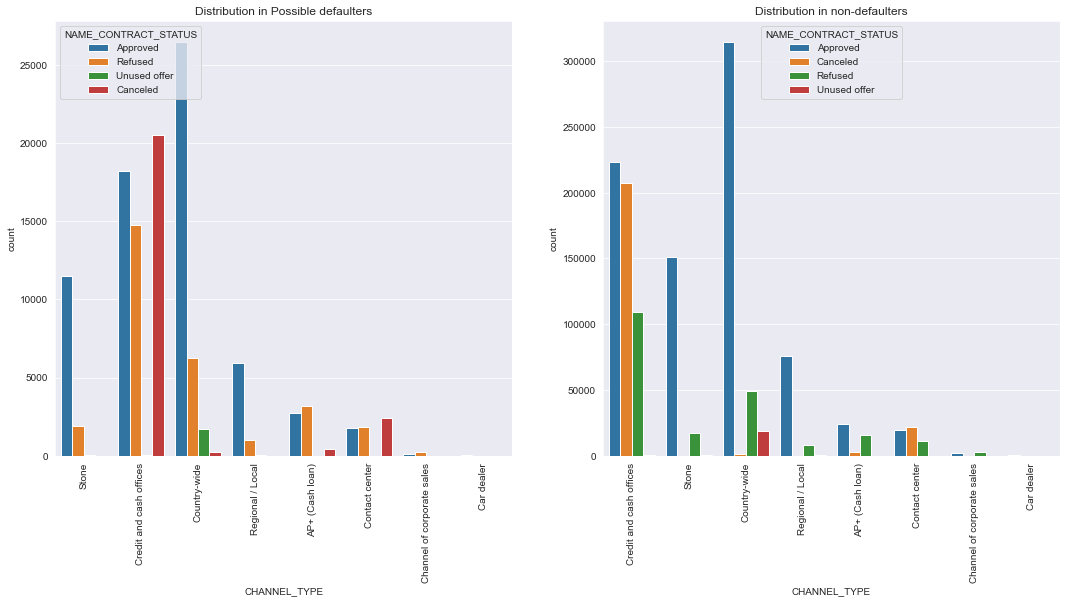

In [193]:
plt.figure(figsize = (18,8))

plt.subplot(121)
plt.title("Distribution in Possible defaulters")
sns.countplot('CHANNEL_TYPE', hue = 'NAME_CONTRACT_STATUS', data = df_combined_1)
plt.xticks(rotation = 90);

plt.subplot(122)
plt.title("Distribution in non-defaulters")
sns.countplot('CHANNEL_TYPE', hue = 'NAME_CONTRACT_STATUS', data = df_combined_0)
plt.xticks(rotation = 90);

##### Inference
- The non-defaulters cancellation is higher through credit and cash offices. We may have to analyse further to see why these clients are cancelling the application.

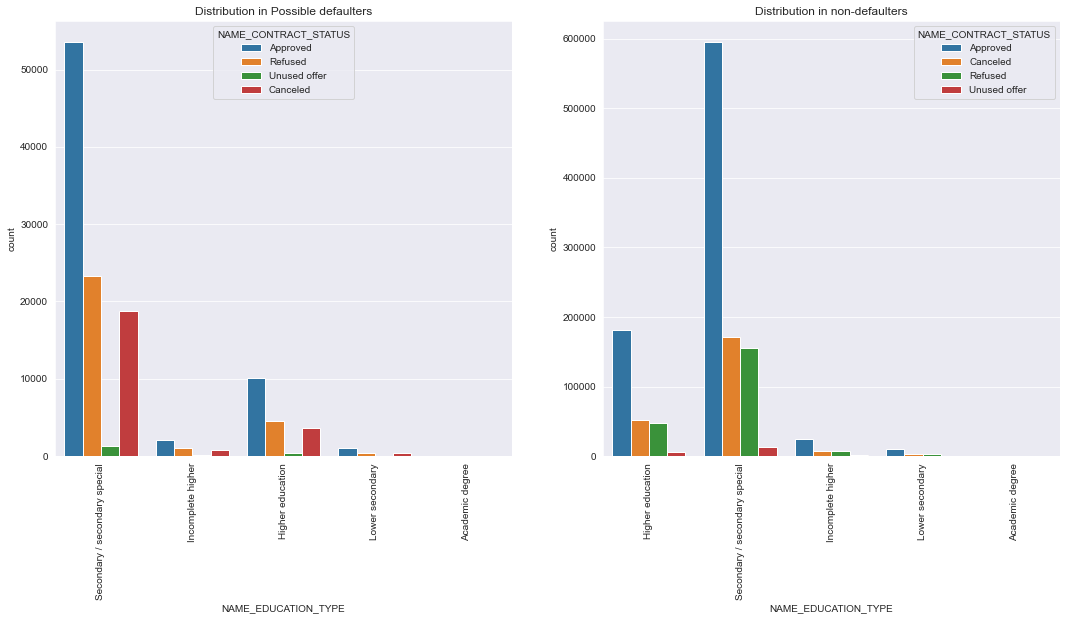

In [194]:
plt.figure(figsize = (18,8))

plt.subplot(121)
plt.title("Distribution in Possible defaulters")
sns.countplot('NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_STATUS', data = df_combined_1)
plt.xticks(rotation = 90);

plt.subplot(122)
plt.title("Distribution in non-defaulters")
sns.countplot('NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_STATUS', data = df_combined_0)
plt.xticks(rotation = 90);

##### Inference
-  We can see that a large number of persons in the non-defaulters category are getting their applications cancelled, the bank needs to look further in this matter to avoid interest loss.

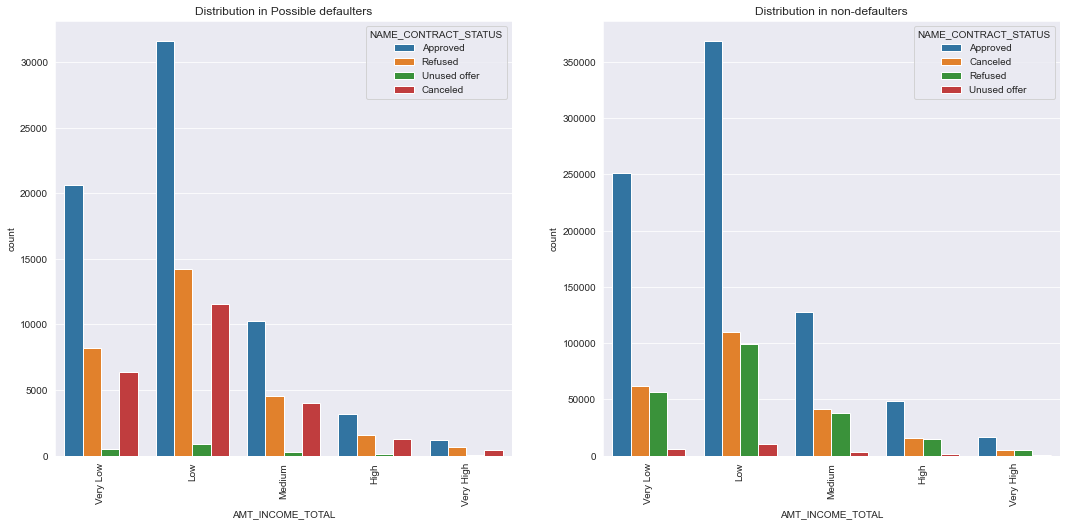

In [195]:
plt.figure(figsize = (18,8))

plt.subplot(121)
plt.title("Distribution in Possible defaulters")
sns.countplot('AMT_INCOME_TOTAL', hue = 'NAME_CONTRACT_STATUS', data = df_combined_1)
plt.xticks(rotation = 90);

plt.subplot(122)
plt.title("Distribution in non-defaulters")
sns.countplot('AMT_INCOME_TOTAL', hue = 'NAME_CONTRACT_STATUS', data = df_combined_0)
plt.xticks(rotation = 90);

##### Inference
- Applicants who have Low income are most refused in non-defaulters, this needs to be looked into to avoid interest loss.